# Primera Entrega ------ " eleccion de datasets potenciales"

Hola!

elegi esta data set "heart attack prediction",es un data set que recopila mas de 8500 registros en 26 campos distintos.
en este data se recopilan datos de pacientes con cierta disponibilidades cardiacas. 

estos pacientes presentan ciertas caracteristicas que los predisponen a tener un mayor riesgo de sufrir un paro cardiaco. 

vamos a querer realizar un modelo predictivo, en donde podramos ver a travez de un sistema de puntos que personas cuentan con mas riesgo de sufrir un ataque cardiaco.

------------------

los factores de riesgo que se miden en este data set son:

*  colesterol
*  presion sanguinea
*  diabetes
*  fumador
*  obesidad
*  consumo de alcohol
*  colesterol
*  presion sanguinea
*  trigliceridos (en valores altos aumenta el riesgo de sufrir enfermedades cardiacas/cerebrovasculares)


tambien se tienen en cuenta otros factores que pueden mejorar o empeorar su predisposicion cardiaca como por ejemplo..:

*  edad
*  sexo
*  cantidad de ejercicio semanal 
*  cantidad de sedentarismo (horas por dia)
*  horas de sueño por dia
*  dieta
*  problema cardiaco anterior (antesedente)
*  uso de medicacion
*  nivel de stress
*  indice de masa muscular (BMI)


por otro lado se realiza una clasificacion por zona geofrafica

*  pais
*  continente
*  hemisferio (norte,sur)


... a continuacion vamos a trabajar un poco nuestros datos...

fuente: 
https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset?select=heart_attack_prediction_dataset.csv

In [1]:
#!pip install fancyimpute


In [2]:
import pandas as pd
import numpy as np
import re 
import os
import seaborn as sns
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.style.use("bmh")
# Para forwad selection
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Libreria para estimar regresión
import statsmodels.formula.api as sm
# Libreria para PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.tree import plot_tree
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score,recall_score, f1_score
# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)
# Saco los warnings
import warnings
warnings.filterwarnings("ignore")



In [3]:
pd.options.display.float_format = '{:.2f}'.format


In [4]:
ruta = "D:\\cursos de programacion e Ingles\\curso coder house\\data science\\desafios entregados\\1ra entrega de dataset de data science"
os.chdir(ruta)

df = pd.read_csv ("heart_attack_prediction_dataset.csv", sep=",")


In [5]:
df.head(5)


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.62,261404,31.25,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.96,285768,27.19,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.46,235282,28.18,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.65,125640,36.46,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.51,160555,21.81,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [6]:
# remplazo los valores de mi patient ID por valores solo numericos correlativos e irrepetibles.

df['Patient ID'], category_ids = pd.factorize(df['Patient ID'])

In [7]:
df.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,0,67,Male,208,158/88,72,0,0,1,0,...,6.62,261404,31.25,286,0,6,Argentina,South America,Southern Hemisphere,0
1,1,21,Male,389,165/93,98,1,1,1,1,...,4.96,285768,27.19,235,1,7,Canada,North America,Northern Hemisphere,0
2,2,21,Female,324,174/99,72,1,0,0,0,...,9.46,235282,28.18,587,4,4,France,Europe,Northern Hemisphere,0
3,3,84,Male,383,163/100,73,1,1,1,0,...,7.65,125640,36.46,378,3,4,Canada,North America,Northern Hemisphere,0
4,4,66,Male,318,91/88,93,1,1,1,1,...,1.51,160555,21.81,231,1,5,Thailand,Asia,Northern Hemisphere,0


vamos a dividir en 2 variables nuevas la variable "Blood Pressure" (presion sanguinea) a partir de ahora vamos a dividir su contenidos en dos nuevas variables que vamos a llamar "presion Sistolica" y "presion Diastolica". esto nos va a ayudar a poder analizar mas eficientemente su contenido.


In [8]:
df[['Presion Sistolica', 'Presion Diastolica']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   int64  
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [9]:
# ponemos Patient ID como indice de nuestro DF

df.index = df["Patient ID"] 
df = df.drop ("Patient ID", axis="columns")

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [11]:
print(df.isna().sum())

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Presion Sistolica                  0
Presion Diastolica                 0
d

In [12]:
print(df.describe()) 

# vamos a observar que las variables diabetes,Family History,Smoking, Obesity, Alcohol Consumption, 
#Previous Heart Problems  Medication Use y Heart Attack Risk  si bien son variables numericas..
# no tiene sentido calcular promedios, quartiles, std, max y min ya que estan conformados por los siguientes valores:
# 1 y 0 (1 = True y 0 = False).

          Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
count 8763.00      8763.00     8763.00   8763.00         8763.00  8763.00   
mean    53.71       259.88       75.02      0.65            0.49     0.90   
std     21.25        80.86       20.55      0.48            0.50     0.30   
min     18.00       120.00       40.00      0.00            0.00     0.00   
25%     35.00       192.00       57.00      0.00            0.00     1.00   
50%     54.00       259.00       75.00      1.00            0.00     1.00   
75%     72.00       330.00       93.00      1.00            1.00     1.00   
max     90.00       400.00      110.00      1.00            1.00     1.00   

       Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.00              8763.00                  8763.00   
mean      0.50                 0.60                    10.01   
std       0.50                 0.49                     5.78   
min       0.00                 0.00               

vamos a realizar un analisis de las variables y extraer algunos datos que consideramos que nos pueden ser utiles para nuestro posterior analisis. 


In [13]:
# que cantidad son hombres y que cantidad son mujeres?                        

print(df["Sex"].value_counts())


Male      6111
Female    2652
Name: Sex, dtype: int64


In [14]:
# que porcentaje del total representa?

# aca realizamos una suma..

male_count = (df["Sex"] == "Male").sum()
female_count = (df["Sex"] == "Female").sum()

print(f"Number of Males: {male_count}")
print(f"Number of Females: {female_count}")

Number of Males: 6111
Number of Females: 2652


In [15]:
# sacamos el % del total que representa cada uno de nuestros analisis... como nuestras variables son "strings" 
# y no es una variable numerica realizamos este tipo de tratamiento especial 

total_count = len(df)
male_proportion = male_count / total_count
female_proportion = female_count / total_count

print(f"Proportion of Males: {round(male_proportion, 3)}")
print(f"Proportion of Females: {round(female_proportion, 3)}")

Proportion of Males: 0.697
Proportion of Females: 0.303


In [16]:
# hacemos lo mismo con la columna de diabetes.

# cuantos son diabeticos

print(df["Diabetes"].value_counts())

1    5716
0    3047
Name: Diabetes, dtype: int64


In [17]:
# que porcentaje representa
print(df["Diabetes"].mean().round(2))

0.65


In [18]:
# Suponiendo que df es tu DataFrame    ...  ayuda de chat gpt

dfDiabeticos = df.loc[df["Diabetes"] == 1]
dfNoDiabeticos = df.loc[df["Diabetes"] == 0]

if not dfDiabeticos.empty:
    prop_diabeticos = dfDiabeticos.shape[0] / df.shape[0]
    print(f"Proporción de Diabéticos: {round(prop_diabeticos, 3)}")
else:
    print("No hay registros de diabéticos en el DataFrame.")

if not dfNoDiabeticos.empty:
    prop_no_diabeticos = dfNoDiabeticos.shape[0] / df.shape[0]
    print(f"Proporción de No Diabéticos: {round(prop_no_diabeticos, 3)}")
else:
    print("No hay registros de no diabéticos en el DataFrame.")

Proporción de Diabéticos: 0.652
Proporción de No Diabéticos: 0.348


In [19]:
# Filtrar los datos para obtener los hipertensos
hipertensos = df[(df['Presion Sistolica'] >= 140) & (df['Presion Diastolica'] >= 90)]

# Calcular la cantidad de hipertensos
cantidad_hipertensos = len(hipertensos)

# Calcular el porcentaje de hipertensos respecto al total
porcentaje_hipertensos = (cantidad_hipertensos / len(df)) * 100

print(f"Cantidad de Hipertensos: {cantidad_hipertensos}")
print(f"Porcentaje de Hipertensos respecto al total: {porcentaje_hipertensos:.2f}%")


Cantidad de Hipertensos: 1685
Porcentaje de Hipertensos respecto al total: 19.23%


In [20]:
# Definir los umbrales
umbral_alto = 100
umbral_bajo = 60

# Filtrar las personas por encima del umbral alto y por debajo del umbral bajo
ritmo_alto = df[df['Heart Rate'] > umbral_alto]
ritmo_bajo = df[df['Heart Rate'] < umbral_bajo]

# Calcular la cantidad y porcentaje de personas por encima del umbral alto
cantidad_ritmo_alto = len(ritmo_alto)
porcentaje_ritmo_alto = (cantidad_ritmo_alto / len(df)) * 100

# Calcular la cantidad y porcentaje de personas por debajo del umbral bajo
cantidad_ritmo_bajo = len(ritmo_bajo)
porcentaje_ritmo_bajo = (cantidad_ritmo_bajo / len(df)) * 100

print(f"Cantidad de Personas con Ritmo Cardíaco por Encima del Umbral Alto: {cantidad_ritmo_alto}")
print(f"Porcentaje de Personas con Ritmo Cardíaco por Encima del Umbral Alto: {porcentaje_ritmo_alto:.2f}%")

print(f"\nCantidad de Personas con Ritmo Cardíaco por Debajo del Umbral Bajo: {cantidad_ritmo_bajo}")
print(f"Porcentaje de Personas con Ritmo Cardíaco por Debajo del Umbral Bajo: {porcentaje_ritmo_bajo:.2f}%")

Cantidad de Personas con Ritmo Cardíaco por Encima del Umbral Alto: 1234
Porcentaje de Personas con Ritmo Cardíaco por Encima del Umbral Alto: 14.08%

Cantidad de Personas con Ritmo Cardíaco por Debajo del Umbral Bajo: 2489
Porcentaje de Personas con Ritmo Cardíaco por Debajo del Umbral Bajo: 28.40%


In [21]:
print(df["Family History"].value_counts())

0    4443
1    4320
Name: Family History, dtype: int64


In [22]:
# Suponiendo que df es tu DataFrame    ...  ayuda de chat gpt

dfEnfermedadesHereditarias = df.loc[df["Family History"] == 1]
dfNoEnfermedadesHereditarias = df.loc[df["Family History"] == 0]

if not dfEnfermedadesHereditarias.empty:
    prop_enfermedades_hereditarias = dfEnfermedadesHereditarias.shape[0] / df.shape[0]
    print(f"Proporción de Enfermedades Hereditarias: {round(prop_enfermedades_hereditarias, 3)}")
else:
    print("No hay registros de enfermedades hereditarias en el DataFrame.")

if not dfNoEnfermedadesHereditarias.empty:
    prop_no_enfermedades_hereditarias = dfNoEnfermedadesHereditarias.shape[0] / df.shape[0]
    print(f"Proporción de No Enfermedades Hereditarias: {round(prop_no_enfermedades_hereditarias, 3)}")
else:
    print("No hay registros de no enfermedades hereditarias en el DataFrame.")

Proporción de Enfermedades Hereditarias: 0.493
Proporción de No Enfermedades Hereditarias: 0.507


In [23]:
print(df["Smoking"].value_counts())

1    7859
0     904
Name: Smoking, dtype: int64


In [24]:
#----------------------

dfFumador = df.loc[df["Smoking"] == 1]
dfNoFumador = df.loc[df["Smoking"] == 0]

if not dfFumador.empty:
    prop_fumador = dfFumador.shape[0] / df.shape[0]
    print(f"Proporción de Fumadores: {round(prop_fumador, 3)}")
else:
    print("No hay registros de fumadores en el DataFrame.")

if not dfNoFumador.empty:
    prop_no_fumador = dfNoFumador.shape[0] / df.shape[0]
    print(f"Proporción de No Fumadores: {round(prop_no_fumador, 3)}")
else:
    print("No hay registros de no fumadores en el DataFrame.")

Proporción de Fumadores: 0.897
Proporción de No Fumadores: 0.103


In [25]:
print(df["Obesity"].value_counts())

1    4394
0    4369
Name: Obesity, dtype: int64


In [26]:
dfObesidad = df.loc[df["Obesity"] == 1]
dfNoObesidad = df.loc[df["Obesity"] == 0]

if not dfObesidad.empty:
    prop_obesidad = dfObesidad.shape[0] / df.shape[0]
    print(f"Proporción de Personas con Obesidad: {round(prop_obesidad, 3)}")
else:
    print("No hay registros de personas con obesidad en el DataFrame.")

if not dfNoObesidad.empty:
    prop_no_obesidad = dfNoObesidad.shape[0] / df.shape[0]
    print(f"Proporción de Personas sin Obesidad: {round(prop_no_obesidad, 3)}")
else:
    print("No hay registros de personas sin obesidad en el DataFrame.")

Proporción de Personas con Obesidad: 0.501
Proporción de Personas sin Obesidad: 0.499


In [27]:
print(df["Alcohol Consumption"].value_counts())

1    5241
0    3522
Name: Alcohol Consumption, dtype: int64


In [28]:
dfConsumoAlcohol = df.loc[df["Alcohol Consumption"] == 1]
dfNoConsumoAlcohol = df.loc[df["Alcohol Consumption"] == 0]

if not dfConsumoAlcohol.empty:
    prop_consumo_alcohol = dfConsumoAlcohol.shape[0] / df.shape[0]
    print(f"Proporción de Personas con Consumo de Alcohol: {round(prop_consumo_alcohol, 3)}")
else:
    print("No hay registros de personas con consumo de alcohol en el DataFrame.")

if not dfNoConsumoAlcohol.empty:
    prop_no_consumo_alcohol = dfNoConsumoAlcohol.shape[0] / df.shape[0]
    print(f"Proporción de Personas sin Consumo de Alcohol: {round(prop_no_consumo_alcohol, 3)}")
else:
    print("No hay registros de personas sin consumo de alcohol en el DataFrame.")


Proporción de Personas con Consumo de Alcohol: 0.598
Proporción de Personas sin Consumo de Alcohol: 0.402


In [29]:
# Definir el umbral
umbral = 3.5

# Filtrar las personas por encima del umbral
exercise_above_umbral = df[df['Exercise Hours Per Week'] > umbral]

# Calcular la cantidad y porcentaje de personas por encima del umbral
cantidad_above_umbral = len(exercise_above_umbral)
porcentaje_above_umbral = (cantidad_above_umbral / len(df)) * 100

print(f"Cantidad de Personas con más de {umbral} horas de ejercicio por semana: {cantidad_above_umbral}")
print(f"Porcentaje de Personas con más de {umbral} horas de ejercicio por semana: {porcentaje_above_umbral:.2f}%")


Cantidad de Personas con más de 3.5 horas de ejercicio por semana: 7211
Porcentaje de Personas con más de 3.5 horas de ejercicio por semana: 82.29%


In [30]:
# Contar los valores únicos en la variable "Diet"
conteo_diet = df['Diet'].value_counts()

# Calcular el porcentaje
porcentaje_diet = (conteo_diet / len(df)) * 100

# Mostrar los resultados
print("Conteo de valores en la variable 'Diet':")
print(conteo_diet)
print("\nPorcentaje de cada valor en la variable 'Diet':")
print(porcentaje_diet)

Conteo de valores en la variable 'Diet':
Healthy      2960
Average      2912
Unhealthy    2891
Name: Diet, dtype: int64

Porcentaje de cada valor en la variable 'Diet':
Healthy     33.78
Average     33.23
Unhealthy   32.99
Name: Diet, dtype: float64


In [31]:
print(df["Previous Heart Problems"].value_counts())

0    4418
1    4345
Name: Previous Heart Problems, dtype: int64


In [32]:
dfProblemasCardiacos = df.loc[df["Previous Heart Problems"] == 1]
dfNoProblemasCardiacos = df.loc[df["Previous Heart Problems"] == 0]

if not dfProblemasCardiacos.empty:
    prop_problemas_cardiacos = dfProblemasCardiacos.shape[0] / df.shape[0]
    print(f"Proporción de Personas con Problemas Cardiacos Previos: {round(prop_problemas_cardiacos, 3)}")
else:
    print("No hay registros de personas con problemas cardiacos previos en el DataFrame.")

if not dfNoProblemasCardiacos.empty:
    prop_no_problemas_cardiacos = dfNoProblemasCardiacos.shape[0] / df.shape[0]
    print(f"Proporción de Personas sin Problemas Cardiacos Previos: {round(prop_no_problemas_cardiacos, 3)}")
else:
    print("No hay registros de personas sin problemas cardiacos previos en el DataFrame.")

Proporción de Personas con Problemas Cardiacos Previos: 0.496
Proporción de Personas sin Problemas Cardiacos Previos: 0.504


In [33]:
print(df["Medication Use"].value_counts())

0    4396
1    4367
Name: Medication Use, dtype: int64


In [34]:
dfUsoMedicacion = df.loc[df["Medication Use"] == 1]
dfNoUsoMedicacion = df.loc[df["Medication Use"] == 0]

if not dfUsoMedicacion.empty:
    prop_uso_medicacion = dfUsoMedicacion.shape[0] / df.shape[0]
    print(f"Proporción de Personas con Uso de Medicación: {round(prop_uso_medicacion, 3)}")
else:
    print("No hay registros de personas con uso de medicación en el DataFrame.")

if not dfNoUsoMedicacion.empty:
    prop_no_uso_medicacion = dfNoUsoMedicacion.shape[0] / df.shape[0]
    print(f"Proporción de Personas sin Uso de Medicación: {round(prop_no_uso_medicacion, 3)}")
else:
    print("No hay registros de personas sin uso de medicación en el DataFrame.")

Proporción de Personas con Uso de Medicación: 0.498
Proporción de Personas sin Uso de Medicación: 0.502


In [35]:
# Filtrar personas con niveles de estrés alto y normal
dfAltoEstres = df[df["Stress Level"] == 10]
dfNormalEstres = df[df["Stress Level"] == 5]

# Calcular las proporciones
prop_alto_estres = len(dfAltoEstres) / len(df)
prop_normal_estres = len(dfNormalEstres) / len(df)

# Mostrar los resultados
print(f"Proporción de Personas con Niveles de Estrés Alto: {prop_alto_estres:.3f}")
print(f"Proporción de Personas con Niveles de Estrés Normal: {prop_normal_estres:.3f}")




Proporción de Personas con Niveles de Estrés Alto: 0.094
Proporción de Personas con Niveles de Estrés Normal: 0.098


In [36]:
# Contar los valores únicos en la variable "Stress Level"
conteo_stress_level = df['Stress Level'].value_counts()

# Calcular el porcentaje
porcentaje_stress_level = (conteo_stress_level / len(df)) * 100

# Mostrar los resultados
print("Conteo de valores en la variable 'Stress Level':")
print(conteo_stress_level)
print("\nPorcentaje de cada valor en la variable 'Stress Level':")
print(porcentaje_stress_level)



Conteo de valores en la variable 'Stress Level':
2     913
4     910
7     903
9     887
8     879
3     868
1     865
5     860
6     855
10    823
Name: Stress Level, dtype: int64

Porcentaje de cada valor en la variable 'Stress Level':
2    10.42
4    10.38
7    10.30
9    10.12
8    10.03
3     9.91
1     9.87
5     9.81
6     9.76
10    9.39
Name: Stress Level, dtype: float64


In [37]:
# Contar la cantidad de valores mayores a 5 en 'Stress Level'
mayores_a_5 = (df['Stress Level'] > 5).sum()

# Calcular el porcentaje de valores mayores a 5
porcentaje_mayores_a_5 = (mayores_a_5 / len(df)) * 100

# Contar la cantidad de valores mayores a 8 en 'Stress Level'
mayores_a_8 = (df['Stress Level'] > 8).sum()

# Calcular el porcentaje de valores mayores a 8
porcentaje_mayores_a_8 = (mayores_a_8 / len(df)) * 100

print(f"Cantidad de valores mayores a 5 en 'Stress Level': {mayores_a_5}")
print(f"Porcentaje de valores mayores a 5 en 'Stress Level': {porcentaje_mayores_a_5:.2f}%")

print(f"Cantidad de valores mayores a 8 en 'Stress Level': {mayores_a_8}")
print(f"Porcentaje de valores mayores a 8 en 'Stress Level': {porcentaje_mayores_a_8:.2f}%")



Cantidad de valores mayores a 5 en 'Stress Level': 4347
Porcentaje de valores mayores a 5 en 'Stress Level': 49.61%
Cantidad de valores mayores a 8 en 'Stress Level': 1710
Porcentaje de valores mayores a 8 en 'Stress Level': 19.51%


In [38]:
# Filtrar personas con Triglicéridos mayores a 200 y menores a 90
dfAltoTrigliceridos = df[df["Triglycerides"] > 200]
dfNormalTrigliceridos = df[(df["Triglycerides"] >= 90) & (df["Triglycerides"] <= 200)]

# Calcular las proporciones
prop_alto_trigliceridos = len(dfAltoTrigliceridos) / len(df)
prop_normal_trigliceridos = len(dfNormalTrigliceridos) / len(df)

# Mostrar los resultados
print(f"Proporción de Personas con Triglicéridos Altos (mayores a 200): {prop_alto_trigliceridos:.3f}")
print(f"Proporción de Personas con Triglicéridos Normales (entre 90 y 200): {prop_normal_trigliceridos:.3f}")






Proporción de Personas con Triglicéridos Altos (mayores a 200): 0.784
Proporción de Personas con Triglicéridos Normales (entre 90 y 200): 0.138


In [39]:
# Filtrar personas con BMI mayor a 25
dfAltoBMI = df[df["BMI"] >= 25]

# Calcular la proporción
prop_alto_bmi = len(dfAltoBMI) / len(df)

# Mostrar los resultados
print(f"Cantidad de Personas con BMI Mayor a 25: {len(dfAltoBMI)}")
print(f"Proporción de Personas con BMI Mayor a 25: {prop_alto_bmi:.3f}")



Cantidad de Personas con BMI Mayor a 25: 5940
Proporción de Personas con BMI Mayor a 25: 0.678


In [40]:
# Total de personas en el DataFrame
total_personas = len(df)

# Filtrar personas con menos de 8 horas de sueño
dfMenos8Horas = df[df["Sleep Hours Per Day"] < 8]

# Filtrar personas con menos de 6 horas de sueño
dfMenos6Horas = df[df["Sleep Hours Per Day"] < 6]

# Calcular proporciones
prop_menos8_horas = len(dfMenos8Horas) / total_personas
prop_menos6_horas = len(dfMenos6Horas) / total_personas

# Mostrar los resultados
print(f"Cantidad de Personas con Menos de 8 Horas de Sueño: {len(dfMenos8Horas)}")
print(f"Proporción de Personas con Menos de 8 Horas de Sueño: {prop_menos8_horas:.3f}")

print(f"Cantidad de Personas con Menos de 6 Horas de Sueño: {len(dfMenos6Horas)}")
print(f"Proporción de Personas con Menos de 6 Horas de Sueño: {prop_menos6_horas:.3f}")


Cantidad de Personas con Menos de 8 Horas de Sueño: 4990
Proporción de Personas con Menos de 8 Horas de Sueño: 0.569
Cantidad de Personas con Menos de 6 Horas de Sueño: 2444
Proporción de Personas con Menos de 6 Horas de Sueño: 0.279


# Segunda entrega. ------Práctica integradora: Visualizaciones en Python----
graficos:
objetivo de esta entrega realizar 3 graficos con libreria matplot y 3 graficos con libreria seaborn.. con sus respetivos comentarios explicando lo que se quiere analizar.
vamos a analizar distintos graficos en busqueda de patrones que nos permita analizar variables que nos resulte util ver.




1) GRAFICO DE BARRAS.             SEXO.


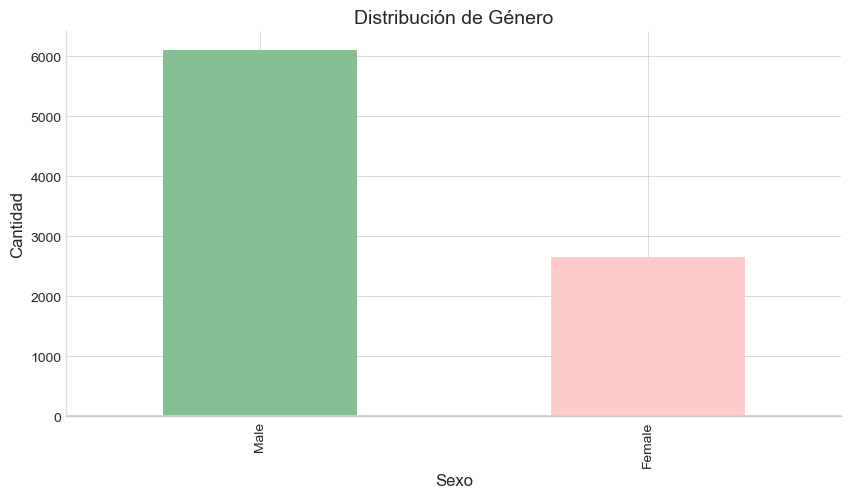

In [41]:

# Calcular la frecuencia de cada valor en la columna 'Sex'
conteo_sex = df['Sex'].value_counts()

# Utilizar un estilo de gráfico más limpio y minimalista
plt.style.use('seaborn-whitegrid')

# Elegir una paleta de colores más suave y agradable
colors = ['#86bf91', '#ffcccb']  # Verde para Male, Rosa suave para Female

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
ax = conteo_sex.plot(kind='bar', color=colors)

# Personalizar el gráfico
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.title('Distribución de Género', fontsize=14)

# Añadir un poco más de espacio entre las etiquetas y los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Eliminar la línea del eje y (porque estamos usando un fondo blanco)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#dddddd')

# Añadir una línea horizontal a través del eje y
plt.axhline(y=0, color='#d3d3d3', linestyle='-')

# Mostrar el gráfico
plt.show()

Lo primero que nos interesa ver en este grafico de barras es como es la distribucion de acuerdo al sexo en las personas que pertenecen al grupo de personas de riesgo de ataque cardiaco..
vemos que de esta muestra de casi 10.000 pacientes. en su mayoria son hombres (casi el 70% vs el 30%)

In [42]:
# sacamos el % del total que representa cada uno de nuestros analisis... como nuestras variables son "strings" 
# y no es una variable numerica realizamos este tipo de tratamiento especial 

total_count = len(df)
male_proportion = male_count / total_count
female_proportion = female_count / total_count

print(f"Proportion of Males: {round(male_proportion, 3)}")
print(f"Proportion of Females: {round(female_proportion, 3)}")

Proportion of Males: 0.697
Proportion of Females: 0.303


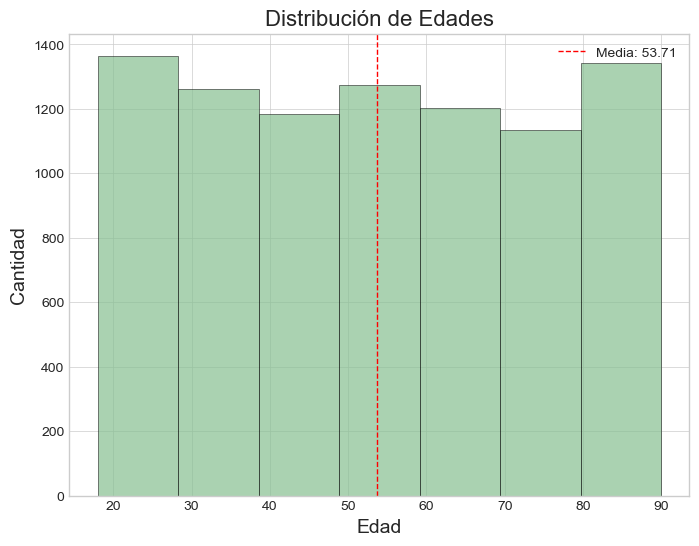

In [43]:
# Utilizar un estilo de gráfico más limpio y minimalista
plt.style.use('seaborn-whitegrid')

# Crear el histograma con 7 barras desde 18 hasta 90
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=7, range=(18, 90), color='#86bf91', edgecolor='black', alpha=0.7)

# Personalizar el gráfico
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.title('Distribución de Edades', fontsize=16)

# Añadir una línea vertical para representar la media (opcional)
mean_age = df['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_age:.2f}')
plt.legend()

# Mostrar el histograma
plt.show()

de nuestro analisis de la variable edad se desprende la siguiente distribucion.
es una distribucion uniforme.


In [44]:
# Definir los rangos de edades
rangos_edades = [(18, 30), (31, 40), (41, 50), (51, 60), (61, 70), (71, 80), (81, 90)]

for rango in rangos_edades:
    edad_inicio, edad_fin = rango
    df_rango = df[(df["Age"] >= edad_inicio) & (df["Age"] <= edad_fin)]
    prop_rango = len(df_rango) / len(df) * 100
    print(f"Personas entre {edad_inicio} y {edad_fin} años:")
    print(f"Cantidad: {len(df_rango)}")
    print(f"Porcentaje del total: {prop_rango:.2f}%\n")


Personas entre 18 y 30 años:
Cantidad: 1615
Porcentaje del total: 18.43%

Personas entre 31 y 40 años:
Cantidad: 1217
Porcentaje del total: 13.89%

Personas entre 41 y 50 años:
Cantidad: 1224
Porcentaje del total: 13.97%

Personas entre 51 y 60 años:
Cantidad: 1153
Porcentaje del total: 13.16%

Personas entre 61 y 70 años:
Cantidad: 1193
Porcentaje del total: 13.61%

Personas entre 71 y 80 años:
Cantidad: 1139
Porcentaje del total: 13.00%

Personas entre 81 y 90 años:
Cantidad: 1222
Porcentaje del total: 13.94%



In [45]:
# Definir el número de bins (partes)
num_bins = 7

# Crear los bins y asignar a cada edad el grupo al que pertenece
df['Age_Group'] = pd.cut(df['Age'], bins=num_bins, labels=False, include_lowest=True)

# Contar la cantidad de edades en cada grupo
conteo_por_grupo = df['Age_Group'].value_counts().sort_index()

# Imprimir el conteo por grupo
print(conteo_por_grupo)

0    1365
1    1262
2    1183
3    1274
4    1203
5    1134
6    1342
Name: Age_Group, dtype: int64


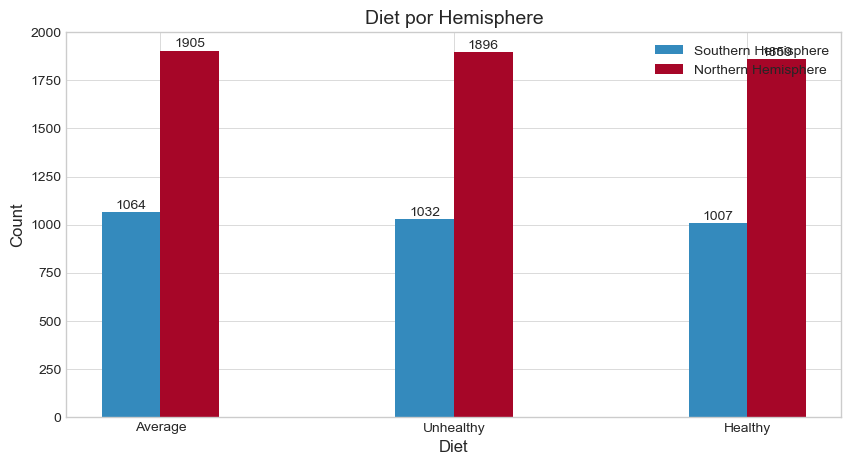

In [46]:
# Supongamos que 'Diet' y 'Hemisphere' son los nombres de tus variables
diet_categories = df['Diet'].unique()
hemisphere_categories = df['Hemisphere'].unique()
n = len(diet_categories)

# Crear un array de índices para posicionar las barras
index = np.arange(n)

# Ancho de las barras (más estrecho)
bar_width = 0.2

# Ajustar el tamaño de la figura y la resolución
plt.figure(figsize=(10, 5), dpi=100)

# Crear los gráficos de barras
plt.bar(index, df[df['Hemisphere'] == hemisphere_categories[0]]['Diet'].value_counts(), bar_width, label=hemisphere_categories[0])
plt.bar(index + bar_width, df[df['Hemisphere'] == hemisphere_categories[1]]['Diet'].value_counts(), bar_width, label=hemisphere_categories[1])

# Añadir detalle numérico encima de las barras
for i, val in enumerate(df[df['Hemisphere'] == hemisphere_categories[0]]['Diet'].value_counts()):
    plt.text(i, val + 1, str(val), ha='center', va='bottom', fontsize=10)

for i, val in enumerate(df[df['Hemisphere'] == hemisphere_categories[1]]['Diet'].value_counts()):
    plt.text(i + bar_width, val + 1, str(val), ha='center', va='bottom', fontsize=10)

# Personalizar el gráfico
plt.xlabel('Diet', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Diet por Hemisphere', fontsize=14)
plt.xticks(index + bar_width / 2, diet_categories)
plt.legend()

# Mostrar el gráfico
plt.show()



en esta distribucion de dieta y hemisferio no se observa que las variantes sean desparejas.. se obversa similitud en las distintas tipos de dietas tanto en el hemisferio sur como en el norte. lo que podemos observar es un mayor numeros de casos reportados en el hemisferio norte en comparacion con el hemisferio sur.

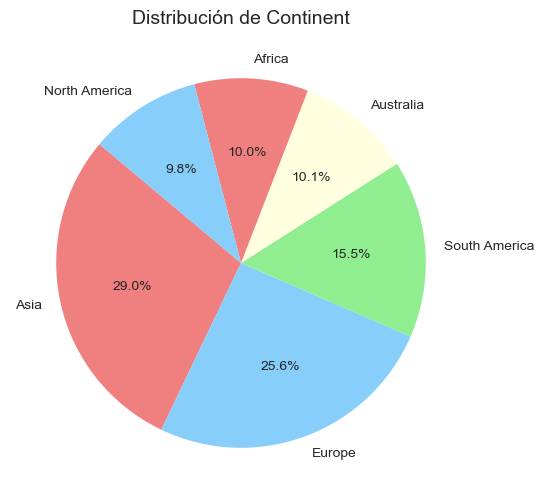

In [47]:
# Supongamos que 'Continent' es el nombre de tu variable y 'df' es tu DataFrame
plt.figure(figsize=(6, 6))

# Contar la frecuencia de cada categoría en 'Continent'
counts = df['Continent'].value_counts()

# Etiquetas para las categorías
labels = counts.index

# Colores para las porciones del gráfico
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow']

# Crear el gráfico de torta
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Personalizar el gráfico
plt.title('Distribución de Continent', fontsize=14)

# Centrar el gráfico en la pantalla (Opción alternativa)
mng = plt.get_current_fig_manager()
mng.full_screen_toggle()

# Mostrar el gráfico
plt.show()


graficos usando libreria de seaborn

en nuestro siguiente analisis vemos que la distribucion de la edad tanto para hombres y para mujeres es muy similar. 
hay que tener encuenta que segun nuestro primer grafico la poblacion de hombres es casi 3 veces mas que el de las mujeres.

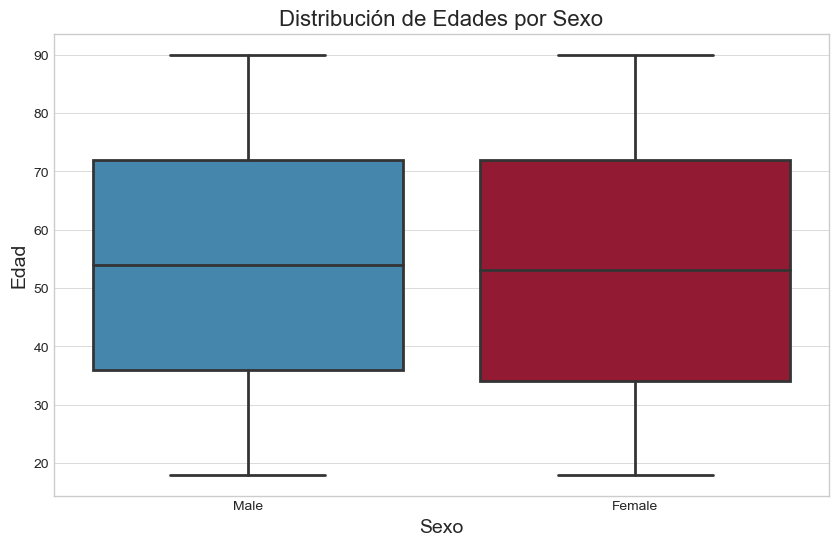

In [48]:
# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='Sex', y='Age', data=df)

# Personalizar el gráfico
plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Edad', fontsize=14)
plt.title('Distribución de Edades por Sexo', fontsize=16)

# Mostrar el gráfico
plt.show()

en este grafico vemos una distribucion paraja en la edad vs el sexo.. no se observan outliers.

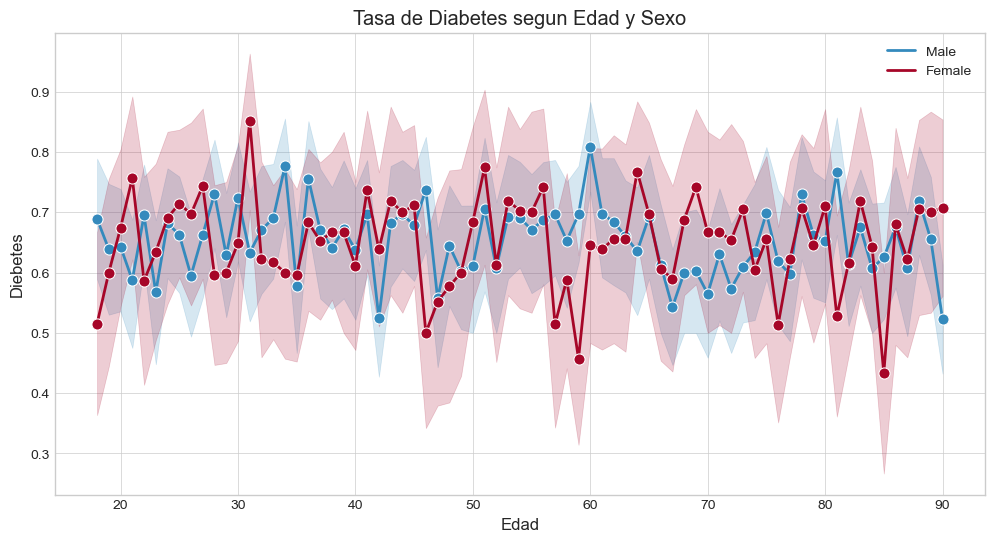

In [49]:
plt.figure(figsize=(12,6))
sns.lineplot(data = df,
            x="Age",
            y = "Diabetes",
            hue="Sex",
            marker = "o",
            linestyle ="-",
            markersize = 8
            )

#personalizar el grafico
plt.xlabel("Edad")
plt.ylabel("Diebetes")
plt.title("Tasa de Diabetes segun Edad y Sexo")
plt.legend()

en este grafico comparamos la cantidad de personas diabeticas segun la edad y el sexo. vemos que los datos se concentran dentro den un mismo rango. vemos pocos outliers. y tambien podemos confirmar esto junto con la linea de codigo que sigue que muestra que en proporcion a pesar de que la muestra de sexo es casi tres veces mas de hombres que de mujeres... vemos que el porcentaje del total es casi el mismo en los dos sexos.
tambien podemos ver que la diabetes no se dispara en algun sexo especifico ni a una edad especifica.
es mas bien linea.

In [50]:
# Contar la cantidad de personas con Diabetes=1 y calcular la proporción
conteo_diabetes_male = df[df['Sex'] == 'Male']['Diabetes'].sum()
proporcion_diabetes_male = conteo_diabetes_male / len(df[df['Sex'] == 'Male'])

conteo_diabetes_female = df[df['Sex'] == 'Female']['Diabetes'].sum()
proporcion_diabetes_female = conteo_diabetes_female / len(df[df['Sex'] == 'Female'])

print(f"Cantidad de hombres con Diabetes: {conteo_diabetes_male} (Proporción: {proporcion_diabetes_male:.2%})")
print(f"Cantidad de mujeres con Diabetes: {conteo_diabetes_female} (Proporción: {proporcion_diabetes_female:.2%})")


Cantidad de hombres con Diabetes: 3993 (Proporción: 65.34%)
Cantidad de mujeres con Diabetes: 1723 (Proporción: 64.97%)


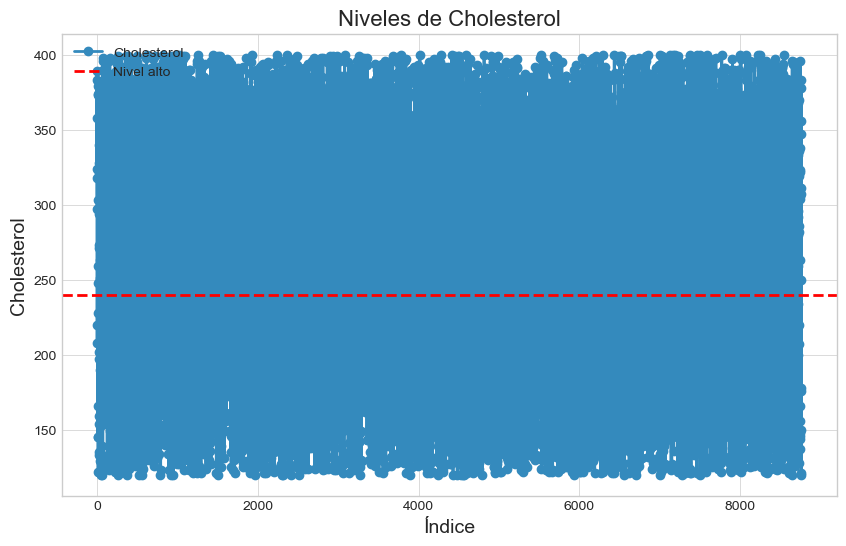

In [51]:

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de línea
plt.plot(df['Cholesterol'], label='Cholesterol', marker='o')

# Añadir una línea horizontal en y=240
plt.axhline(y=240, color='r', linestyle='--', label='Nivel alto')

# Personalizar el gráfico
plt.xlabel('Índice', fontsize=14)
plt.ylabel('Cholesterol', fontsize=14)
plt.title('Niveles de Cholesterol', fontsize=16)
plt.legend()

# Mostrar el gráfico
plt.show()

In [52]:
# Contar cuántos valores están por encima de 240
valores_altos = df[df['Cholesterol'] > 240]

# Calcular el porcentaje
porcentaje_altos = (len(valores_altos) / len(df)) * 100

print(f"Porcentaje de valores por encima de 240: {porcentaje_altos:.2f}%")

Porcentaje de valores por encima de 240: 57.26%


en este grafico podemos ver que de toda nuestra muestra el 57 % de las personas presentan un nivel alto de colesterol en sangre.


podriamos seguir haciendo graficos pero por el momento llegamos hasta aca... con este analis de esta entrega.. saludos!

# Tercera entrega ----Estructurando un Proyecto de DS (parte I)-------
nuestro objetivo es predecir a travez de un puntaje a los pacientes que a partir de un cierto puntaje tiene altas chances de sufrir un ataque cardiaco.

In [53]:
# Contar cuántos son 1 y cuántos son 0 en la variable "Heart Attack Risk"
conteo_1 = df['Heart Attack Risk'].sum()  # Suma de los valores 1
conteo_0 = len(df) - conteo_1  # Restar la cantidad de 1s del total para obtener la cantidad de 0s

# Calcular el porcentaje
porcentaje_1 = (conteo_1 / len(df)) * 100
porcentaje_0 = (conteo_0 / len(df)) * 100

# Mostrar los resultados
print(f"Cantidad de 1s en 'Heart Attack Risk': {conteo_1}")
print(f"Porcentaje de 1s en 'Heart Attack Risk': {porcentaje_1:.2f}%")

print(f"Cantidad de 0s en 'Heart Attack Risk': {conteo_0}")
print(f"Porcentaje de 0s en 'Heart Attack Risk': {porcentaje_0:.2f}%")

# de acuerdo a esta variable quiero saber que caracteristicas tiene los que ya sufrieron un atake y predecir cuales de los que no pueden tener 1 o que tan cerca estan

Cantidad de 1s en 'Heart Attack Risk': 3139
Porcentaje de 1s en 'Heart Attack Risk': 35.82%
Cantidad de 0s en 'Heart Attack Risk': 5624
Porcentaje de 0s en 'Heart Attack Risk': 64.18%


<Figure size 640x480 with 0 Axes>

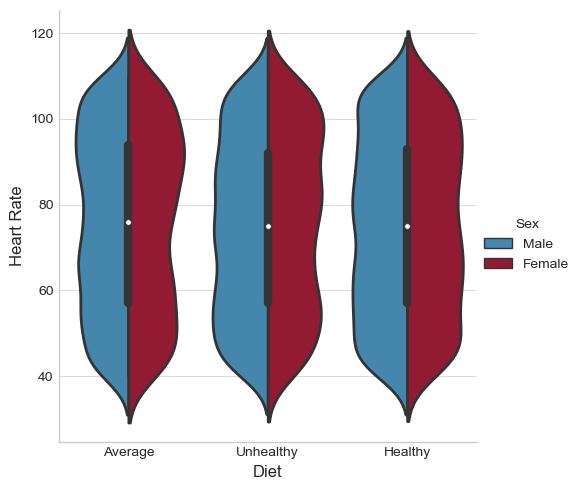

In [54]:
plt.figure()
sns.catplot(data = df,
           kind="violin",
           x="Diet",
           y="Heart Rate",
           hue="Sex",
           split=True)

en este grafico trivariado comparamos la dieta llevada a cabo por las personas que integran nuestra muestra, dividido por genero y por riesgo cardiaco.. 
podemos ver una ditribucion pareja en estas variables.

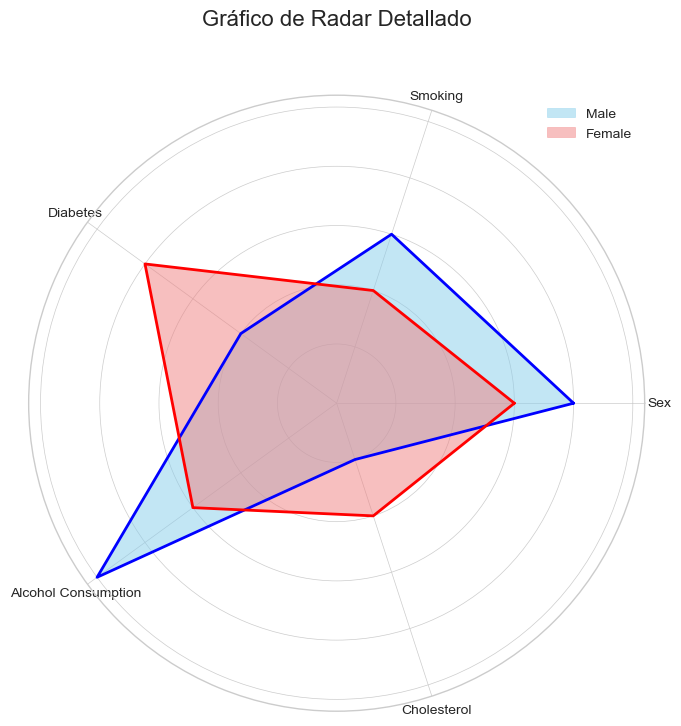

In [55]:
# Definir las categorías y sus valores para Male y Female
categories = ['Sex', 'Smoking', 'Diabetes', 'Alcohol Consumption', 'Cholesterol']
values_male = [4, 3, 2, 5, 1]
values_female = [3, 2, 4, 3, 2]

# Calcular el ángulo para cada eje
num_vars = len(categories)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()

# Hacer que el gráfico sea circular
values_male += values_male[:1]
values_female += values_female[:1]
angles += angles[:1]

# Inicializar el gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values_male, color='skyblue', alpha=0.5, label='Male')
ax.fill(angles, values_female, color='lightcoral', alpha=0.5, label='Female')

# Añadir líneas conectando los puntos
ax.plot(angles, values_male, color='blue', linewidth=2)
ax.plot(angles, values_female, color='red', linewidth=2)

# Etiquetar los ejes
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Añadir una etiqueta central
plt.title('Gráfico de Radar Detallado', fontsize=16, y=1.1)

# Añadir leyenda
ax.legend(loc='upper right')

# Mostrar el gráfico
plt.show()


realizamos un grafico multivariado.. analizamos varias variables al mismo tiempo y lo comparamos en el mismo grafico con distintos sexos.. a si mple vista podemos ver que la diabetes y el colesterol afectaa mas a las mujeres que a los hombres y que el alcohol y el cigarrillo afecta mas a los hombres... 

las variables que me voy a quedar de mi data van a ser:
 age, sex, Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,BMI, Triglycerides,Physical Activity Days Per Week,

# Cuarta entrega  --------Estructurando un Proyecto de DS (parte II)-------

de nuestro Df  vamos a queres realizar un modelo predictivo que a travez de un sistema de puntos nos va a ayudar a determinar cuales son los pacientes que son los mas proclives a sufrir un ataque cardiaco.
para eso vamos a crear nuevos campos que nos van a ayudar a crear nuesta "Variable Target"


en esta entrega acompañaremos con nuestro analisis algunos graficos univariados, bivariados y/o trivariados junto con algunos comentarios que nos va a ayudar a interpretarlos mejor.



In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

# vamos a crear variables y de esas variables vamos a crear otra que usaremos como variable target . (a partir de la clase 11)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

---------- vamos a realizar algunas transformaciones de nuestras variables... vamos a ponerle clasificacion numericas ----------------

In [58]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Age'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariableAge según las condiciones dadas
def asignar_variable_age(edad):
    if 18 <= edad <= 39:
        return 1
    elif 40 <= edad <= 59:
        return 2
    elif 60 <= edad <= 69 or 70 <= edad <= 79:
        return 3
    elif 80 <= edad <= 90:
        return 4
    else:
        return None  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Age' para crear la nueva columna 'VariableAge'
df['VariableAge'] = df['Age'].apply(asignar_variable_age)


In [59]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Sex'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariableSex según las condiciones dadas
def asignar_variable_sex(sexo):
    if sexo == "Male":
        return 3
    elif sexo == "Female":
        return 1
    else:
        return None  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Sex' para crear la nueva columna 'VariableSex'
df['VariableSex'] = df['Sex'].apply(asignar_variable_sex)


In [60]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Cholesterol'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariableCholesterol según las condiciones dadas
def asignar_variable_cholesterol(Cholesterol):
    if 120 <= Cholesterol <= 201:
        return 1
    elif 202 <= Cholesterol <= 240:
        return 2
    elif 241 <= Cholesterol <= 300:
        return 3
    elif 301 <= Cholesterol <= 400:
        return 4
    else:
        return None  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Cholesterol' para crear la nueva columna 'VariableCholesterol'
df['VariableCholesterol'] = df['Cholesterol'].apply(asignar_variable_cholesterol)


In [61]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Presion Sistolica'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariablePresionSistolica según las condiciones dadas
def asignar_variable_presion_sistolica(presion):
    if 80 <= presion <= 109:
        return 3
    elif 110 <= presion <= 120:
        return 0
    elif 121 <= presion <= 130:
        return 1
    elif 131 <= presion <= 140:
        return 2
    elif presion > 141:
        return 3
    else:
        return 3  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Presion Sistolica' para crear la nueva columna 'VariablePresionSistolica'
df['VariablePresionSistolica'] = df['Presion Sistolica'].apply(asignar_variable_presion_sistolica)


In [62]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Presion Diastolica'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariablePresionDiastolica según las condiciones dadas
def asignar_variable_presion_diastolica(presion):
    if 40 <= presion <= 70:
        return 3
    elif 71 <= presion <= 80:
        return 2
    elif 81 <= presion <= 90:
        return 0
    elif 91 <= presion <= 100:
        return 2
    elif presion > 100:
        return 3
    else:
        return 3  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Presion Diastolica' para crear la nueva columna 'VariablePresionDiastolica'
df['VariablePresionDiastolica'] = df['Presion Diastolica'].apply(asignar_variable_presion_diastolica)


In [63]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Heart rate'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariableHeartrate según las condiciones dadas
def asignar_variable_heartrate(HeartRate):
    if 40 <= HeartRate <= 49:
        return 3
    elif 50 <= HeartRate <= 59:
        return 2
    elif 60 <= HeartRate <= 100:
        return 0
    elif HeartRate > 100:
        return 2
    else:
        return 2  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Heart rate' para crear la nueva columna 'VariableHeartrate'
df['VariableHeartrate'] = df['Heart Rate'].apply(asignar_variable_heartrate)


In [64]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Diabetes'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariableDiabetes según las condiciones dadas
def asignar_variable_diabetes(diabetes):
    if diabetes == 1:
        return 3
    elif diabetes == 0:
        return 0
    else:
        return 0  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Diabetes' para crear la nueva columna 'VariableDiabetes'
df['VariableDiabetes'] = df['Diabetes'].apply(asignar_variable_diabetes)


In [65]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Family History'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariableFamilyHistory según las condiciones dadas
def asignar_variable_family_history(history):
    if history == 1:
        return 1
    elif history == 0:
        return 0
    else:
        return None  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Family History' para crear la nueva columna 'VariableFamilyHistory'
df['VariableFamilyHistory'] = df['Family History'].apply(asignar_variable_family_history)


In [66]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Smoking'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariableSmoking según las condiciones dadas
def asignar_variable_smoking(smoking):
    if smoking == 1:
        return 3
    elif smoking == 0:
        return 0
    else:
        return None  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Smoking' para crear la nueva columna 'VariableSmoking'
df['VariableSmoking'] = df['Smoking'].apply(asignar_variable_smoking)


In [67]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Obesity'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariableObesity según las condiciones dadas
def asignar_variable_obesity(obesity):
    if obesity == 1:
        return 3
    elif obesity == 0:
        return 0
    else:
        return None  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Obesity' para crear la nueva columna 'VariableObesity'
df['VariableObesity'] = df['Obesity'].apply(asignar_variable_obesity)


In [68]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Alcohol Consumption'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariableAlcoholConsumption según las condiciones dadas
def asignar_variable_alcohol_consumption(alcohol):
    if alcohol == 1:
        return 3
    elif alcohol == 0:
        return 0
    else:
        return None  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Alcohol Consumption' para crear la nueva columna 'VariableAlcoholConsumption'
df['VariableAlcoholConsumption'] = df['Alcohol Consumption'].apply(asignar_variable_alcohol_consumption)


In [69]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Exercise Hours Per Week'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariableExerciseHoursPerWeek según las condiciones dadas
def asignar_variable_exercise_hours_per_week(hours):
    if hours == 0:
        return 4
    elif hours in [1, 2]:
        return -1
    elif hours in [3, 4]:
        return -2
    elif hours >= 5:
        return -4
    else:
        return -4  

# Aplica la función a la columna 'Exercise Hours Per Week' para crear la nueva columna 'VariableExerciseHoursPerWeek'
df['VariableExerciseHoursPerWeek'] = df['Exercise Hours Per Week'].apply(asignar_variable_exercise_hours_per_week)


In [70]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Diet'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariableDiet según las condiciones dadas
def asignar_variable_diet(diet):
    if diet == "Average":
        return -1
    elif diet == "Unhealthy":
        return 4
    elif diet == "Healthy":
        return -4
    else:
        return None  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Diet' para crear la nueva columna 'VariableDiet'
df['VariableDiet'] = df['Diet'].apply(asignar_variable_diet)


In [71]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Previous Heart Problems'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariablePreviousHeartProblem según las condiciones dadas
def asignar_variable_previous_heart_problem(problems):
    if problems == 1:
        return 1
    elif problems == 0:
        return 0
    else:
        return None  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Previous Heart Problems' para crear la nueva columna 'VariablePreviousHeartProblem'
df['VariablePreviousHeartProblem'] = df['Previous Heart Problems'].apply(asignar_variable_previous_heart_problem)


In [72]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Stress Level'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariableStressLevel según las condiciones dadas
def asignar_variable_stress_level(stress):
    if stress in [1, 2]:
        return 0
    elif stress in [3, 4]:
        return 2
    elif stress in [5, 6]:
        return 3
    elif stress in [7, 8]:
        return 4
    elif stress >= 9:
        return 5
    else:
        return None  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Stress Level' para crear la nueva columna 'VariableStressLevel'
df['VariableStressLevel'] = df['Stress Level'].apply(asignar_variable_stress_level)


In [73]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'BMI'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariableBMI según las condiciones dadas
def asignar_variable_bmi(bmi):
    if bmi <= 18.5:
        return -1
    elif 18.6 <= bmi <= 25:
        return 0
    elif 25.1 <= bmi <= 30:
        return 1
    elif bmi > 30:
        return 2
    else:
        return 2  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'BMI' para crear la nueva columna 'VariableBMI'
df['VariableBMI'] = df['BMI'].apply(asignar_variable_bmi)


In [74]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Triglycerides'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariableTriglycerides según las condiciones dadas
def asignar_variable_triglycerides(triglycerides):
    if 30 <= triglycerides <= 120:
        return 3
    elif 121 <= triglycerides <= 135:
        return 2
    elif 136 <= triglycerides <= 149:
        return 1
    elif 150 <= triglycerides <= 199:
        return 0
    elif 200 <= triglycerides <= 499:
        return 1
    elif 500 <= triglycerides <= 800:
        return 3
    else:
        return None  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Triglycerides' para crear la nueva columna 'VariableTriglycerides'
df['VariableTriglycerides'] = df['Triglycerides'].apply(asignar_variable_triglycerides)


In [75]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Sleep Hours Per Day'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariableSleepHoursPerDay según las condiciones dadas
def asignar_variable_sleep_hours_per_day(hours):
    if 4 <= hours <= 6:
        return 4
    elif 7 <= hours <= 9:
        return 0
    elif hours == 10:
        return 1
    else:
        return None  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Sleep Hours Per Day' para crear la nueva columna 'VariableSleepHoursPerDay'
df['VariableSleepHoursPerDay'] = df['Sleep Hours Per Day'].apply(asignar_variable_sleep_hours_per_day)


In [76]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Heart Attack Risk'
# Si no la tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Define una función que asigna el valor de VariableHeartAttackRisk según las condiciones dadas
def asignar_variable_heart_attack_risk(risk):
    if risk == 1:
        return 2
    elif risk == 0:
        return 0
    else:
        return None  # Puedes manejar otros casos según lo que necesites

# Aplica la función a la columna 'Heart Attack Risk' para crear la nueva columna 'VariableHeartAttackRisk'
df['VariableHeartAttackRisk'] = df['Heart Attack Risk'].apply(asignar_variable_heart_attack_risk)


In [77]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado df con las columnas mencionadas
# Si no las tienes, asegúrate de cargar tu conjunto de datos correctamente.

# Lista de las variables a promediar
variables_a_promediar = [
    "VariableAge", "VariableSex", "VariableCholesterol",
    "VariablePresionSistolica", "VariablePresionDiastolica",
    "VariableHeartrate", "VariableDiabetes", "VariableFamilyHistory",
    "VariableSmoking", "VariableObesity", "VariableAlcoholConsumption",
    "VariableExerciseHoursPerWeek", "VariableDiet", "VariablePreviousHeartProblem",
    "VariableStressLevel", "VariableBMI", "VariableTriglycerides",
    "VariableSleepHoursPerDay", "VariableHeartAttackRisk"
]

# Calcular el promedio de las variables y asignarlo a la nueva columna 'VariableTarget'
df['VariableTarget'] = df[variables_a_promediar].mean(axis=1)


In [78]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

vamos a completar las siguientes variables que presentan campos vacios.
VariableExerciseHoursPerWeek
VariableBMI


# vamos a analizar nuestros ourliers... (clase 11)

#metodo IQR

In [79]:
variable_target = df['VariableTarget']
variable_target.describe()

count   8763.00
mean       1.35
std        0.32
min        0.16
25%        1.11
50%        1.37
75%        1.58
max        2.37
Name: VariableTarget, dtype: float64

<Axes: xlabel='VariableTarget', ylabel='Probability'>

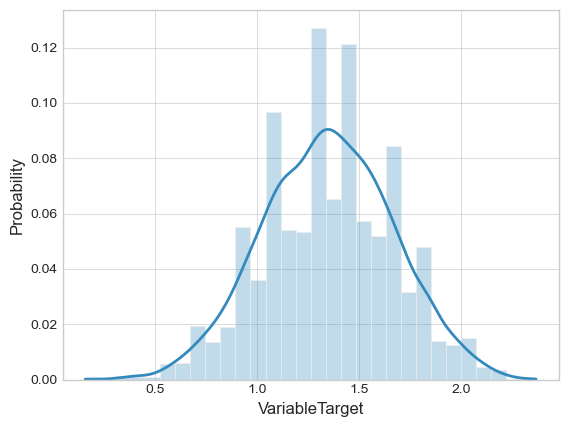

In [80]:
# Histograma variable target 
plt.figure()
sns.histplot(data = df,
             x = 'VariableTarget',
             bins = 30,            
             alpha = 0.3,
             kde = True,
             stat='probability')

In [81]:
primer_cuartil = df['VariableTarget'].quantile(0.25)
tercer_cuartil = df['VariableTarget'].quantile(0.75)
rango_intercuartilico = tercer_cuartil - primer_cuartil

# Limites: 
limite_inf = primer_cuartil - (1.5 * rango_intercuartilico)
limite_sup = tercer_cuartil + (1.5 * rango_intercuartilico)

print(limite_inf, limite_sup)

0.3947368421052634 2.289473684210526


In [82]:
# Identifico outliers: 
df['Otlier_IQR'] = np.where((df['VariableTarget'] < limite_inf) | (df['VariableTarget'] > limite_sup),1,0)
df['Otlier_IQR'].value_counts()

0    8747
1      16
Name: Otlier_IQR, dtype: int64

Text(0.5, 1.0, 'Detección Outliers - Metodo IQR')

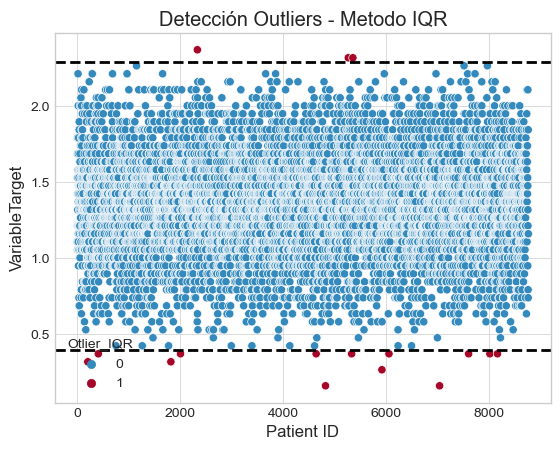

In [83]:
# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = 'Patient ID',
                y = 'VariableTarget',
               hue = 'Otlier_IQR')
plt.axhline(y = limite_inf, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers - Metodo IQR')

# analizo la correlacion de dependencia y regresion de mis variables  (clase 12)  

In [84]:
# Definir el modelo de regresión lineal
model_formula = "VariableTarget ~ VariableAge + VariableSex + VariableCholesterol + VariablePresionSistolica + VariablePresionDiastolica + VariableHeartrate + VariableDiabetes + VariableFamilyHistory + VariableSmoking + VariableObesity + VariableAlcoholConsumption + VariableExerciseHoursPerWeek + VariableDiet + VariablePreviousHeartProblem + VariableStressLevel + VariableBMI + VariableTriglycerides + VariableSleepHoursPerDay + VariableHeartAttackRisk"
lm = sm.OLS.from_formula(formula=model_formula, data=df).fit()

# Imprimir el resumen del modelo
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:         VariableTarget   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.305e+31
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:14:05   Log-Likelihood:             2.9250e+05
No. Observations:                8763   AIC:                        -5.850e+05
Df Residuals:                    8744   BIC:                        -5.848e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [85]:
coeficientes = lm.params
print('Coeficientes:')
print(coeficientes)

Coeficientes:
Intercept                      -0.01
VariableAge                     0.05
VariableSex                     0.05
VariableCholesterol             0.05
VariablePresionSistolica        0.05
VariablePresionDiastolica       0.05
VariableHeartrate               0.05
VariableDiabetes                0.05
VariableFamilyHistory           0.05
VariableSmoking                 0.05
VariableObesity                 0.05
VariableAlcoholConsumption      0.05
VariableExerciseHoursPerWeek    0.05
VariableDiet                    0.05
VariablePreviousHeartProblem    0.05
VariableStressLevel             0.05
VariableBMI                     0.05
VariableTriglycerides           0.05
VariableSleepHoursPerDay        0.05
VariableHeartAttackRisk         0.05
dtype: float64


In [86]:
intervalo_confianza = lm.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza)

Intervalo de confianza de los coeficientes:
                                 0     1
Intercept                    -0.01 -0.01
VariableAge                   0.05  0.05
VariableSex                   0.05  0.05
VariableCholesterol           0.05  0.05
VariablePresionSistolica      0.05  0.05
VariablePresionDiastolica     0.05  0.05
VariableHeartrate             0.05  0.05
VariableDiabetes              0.05  0.05
VariableFamilyHistory         0.05  0.05
VariableSmoking               0.05  0.05
VariableObesity               0.05  0.05
VariableAlcoholConsumption    0.05  0.05
VariableExerciseHoursPerWeek  0.05  0.05
VariableDiet                  0.05  0.05
VariablePreviousHeartProblem  0.05  0.05
VariableStressLevel           0.05  0.05
VariableBMI                   0.05  0.05
VariableTriglycerides         0.05  0.05
VariableSleepHoursPerDay      0.05  0.05
VariableHeartAttackRisk       0.05  0.05


In [87]:
pvalores = lm.pvalues
print('P-Valores:')
print(pvalores.round(6))

P-Valores:
Intercept                      0.00
VariableAge                    0.00
VariableSex                    0.00
VariableCholesterol            0.00
VariablePresionSistolica       0.00
VariablePresionDiastolica      0.00
VariableHeartrate              0.00
VariableDiabetes               0.00
VariableFamilyHistory          0.00
VariableSmoking                0.00
VariableObesity                0.00
VariableAlcoholConsumption     0.00
VariableExerciseHoursPerWeek   0.00
VariableDiet                   0.00
VariablePreviousHeartProblem   0.00
VariableStressLevel            0.00
VariableBMI                    0.00
VariableTriglycerides          0.00
VariableSleepHoursPerDay       0.00
VariableHeartAttackRisk        0.00
dtype: float64


In [88]:
r_cuadrado = lm.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

Coeficiente de determinación (R-cuadrado): 1.0


# para poder visualizar nuestro modelo vamos a realizar un modelado con PCA

In [89]:
# Selecciono variables a juntar
df_PCA = df[["VariableDiabetes","VariableSmoking","VariableFamilyHistory", "VariableObesity","VariableAlcoholConsumption","VariablePreviousHeartProblem",
                 "VariableHeartrate", "VariableExerciseHoursPerWeek", "VariablePresionSistolica", "VariablePresionDiastolica",
                 "VariableStressLevel", "VariableBMI", "VariableTriglycerides","VariableCholesterol",
                "VariableSleepHoursPerDay", "VariableHeartAttackRisk","VariableAge", "VariableSex", "VariableDiet"]]

# Normalizo la variable
scaler = StandardScaler()
X = df_PCA.values
X = scaler.fit_transform(X)

# Genero objeto pca
pca = PCA(n_components = 2)

# Se lo aplico al dataset elegido
pca.fit(X)

# Calculo PCA
componentes_principales = pca.transform(X)

# Almaceno en dataframe y presento
df_PCA_final_2 = pd.DataFrame(data = componentes_principales)
prefijo = "PC_"
df_PCA_final_2 = df_PCA_final_2.add_prefix(prefijo)
df_PCA_final_2.head()

,PC_0,PC_1
0,-1.03,0.18
1,-0.03,-1.70
2,3.43,0.68
3,-1.41,0.05
4,-0.96,0.31


# graficamos...

Text(0.5, 1.0, 'Relación entre componentes y variable target')

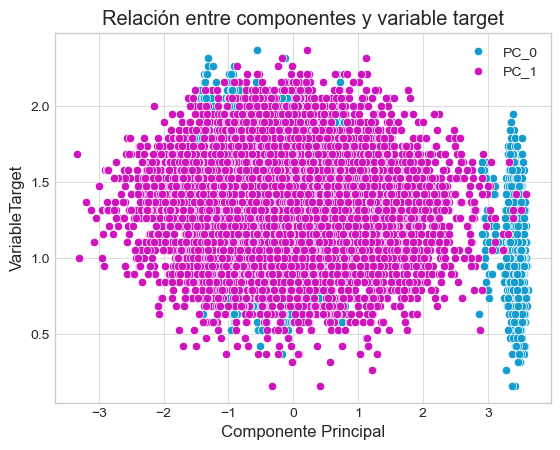

In [90]:
# Visualmente 
df['PC_0'] = df_PCA_final_2['PC_0']
df['PC_1'] = df_PCA_final_2['PC_1']

plt.figure()
sns.scatterplot(data = df,
                x = 'PC_0',
                y = 'VariableTarget',
               label='PC_0', 
               color = '#129CD0',
                alpha = 1)
sns.scatterplot(data = df, 
                x = 'PC_1', 
                y = 'VariableTarget', 
                label = 'PC_1', 
                color = '#D012BF',
                alpha = 1)
plt.xlabel('Componente Principal')
plt.ylabel('VariableTarget')
plt.title('Relación entre componentes y variable target')

el algoritmo que queremos construir es un algoritmo  supervisado de regresion. no tenemos una variable de lo que queremos construir.. la vamos a crear nosotros a partir de las variables que tenemos.. creamos una variable target que es el promedio de otras variables que creamos (estas ultimas las hicimos en base a otras que teniamos en nuestro df. le dimos un puntaje de acuerdo a cierto valores que presentaban)

modelo supervisado de regresion.: vamos a querer estimar un numero, una probabilidad o una categoria.
objetivo: quiero predecir a travez de un modelo cuales son los pacientes que tienen mayor riesgo de un ataque cardiaco
variable target: es un promedio de todas mis variables a analizar
features: son todas mis variables a las cuales transforme y le puse un puntaje que representa una escala del valor que contiene.

Variable Target: "VariableTarget" es de tipo numerica.. la construimos en base al promedio de otras variables... por lo que el modelo a desarrollar sera de tipo aprendizaje supervisado: regresion.


In [91]:
df['VariableTarget'].describe().round(2)

count   8763.00
mean       1.35
std        0.32
min        0.16
25%        1.11
50%        1.37
75%        1.58
max        2.37
Name: VariableTarget, dtype: float64

Text(0.5, 1.0, 'Distribución de VariableTarget')

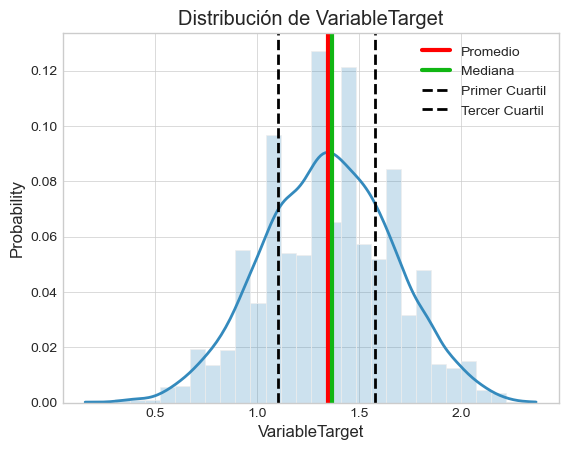

In [92]:
# Histograma variable target 
# Primero calculo algunas medidas que quiero presentar 
media = df['VariableTarget'].mean()
mediana = df['VariableTarget'].median()
primer_cuartil = df['VariableTarget'].quantile(0.25)
tercer_cuartil = df['VariableTarget'].quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'VariableTarget',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability')
# Agrego linea de promedio 
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana 
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil 
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil 
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Distribución de VariableTarget')

#Análisis Variable Target: VariableTarget
Se puede observar que la variable tiene una distribución asimétrica levemente negativa, concentrando registros mixtos y de agrupacion despareja.

Al tratar con una variable target de este tipo de distribución, una buena prácica suele ser intentar predecir el logaritmo de la variable, para suavizar un poco la curva de valores posibles.


Text(0.5, 1.0, 'Distribución de VariableTarget transformado a Logaritmo')

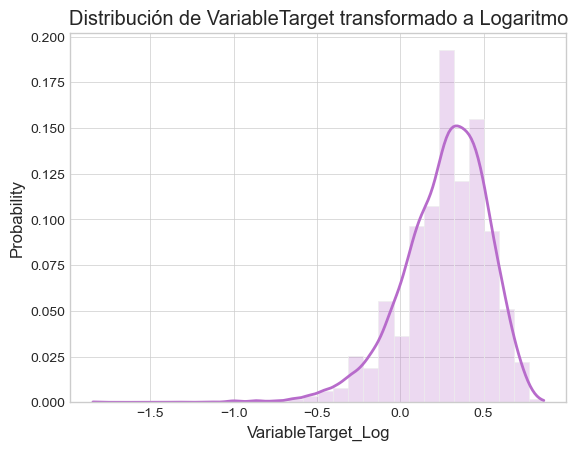

In [93]:
# Primero genero la variable logaritmica 
df['VariableTarget_Log'] = np.log(df['VariableTarget'])

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'VariableTarget_Log',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#B76BCB')
plt.title('Distribución de VariableTarget transformado a Logaritmo')

# conclusion:  aplicando la transformacion de logaritmo.. la vamos a desestimar ya que la forma que nos ofrece es de una distribucion a la izquierda superior a la que observabamos antes... 

In [94]:
# Calculo y muestro variables con vacíos 
valores_nulos  = df.isnull().sum()
columnas_con_nulos = valores_nulos[valores_nulos > 0]
print('Cantidad de columnas con valores vacíos:')
print(columnas_con_nulos.shape)
print('')
print('Variables con valores vacíos: ')
print(columnas_con_nulos.sort_values(ascending=False))

Cantidad de columnas con valores vacíos:
(0,)

Variables con valores vacíos: 
Series([], dtype: int64)


In [95]:
# Calculo matriz de correlación 
matriz_correlacion = df.corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['VariableTarget']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['VariableTarget',"VariableTarget_Log"]
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

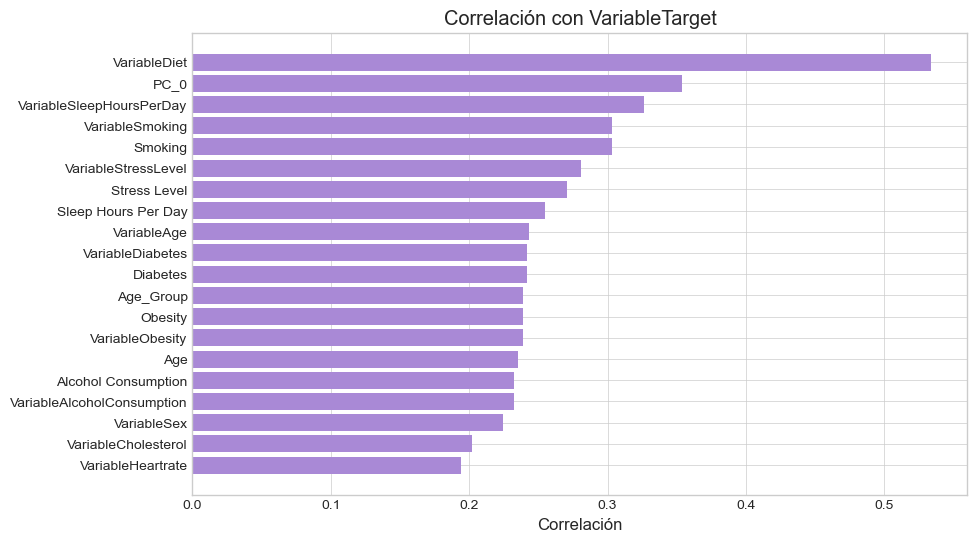

In [96]:
# Grafico el top 20 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con VariableTarget')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

Nuesta variable "variablediet" es que de todas nuestras variables la que mejor se relaciona con nuestra variable target..

Text(0, 0.5, 'Cantidad de casos')

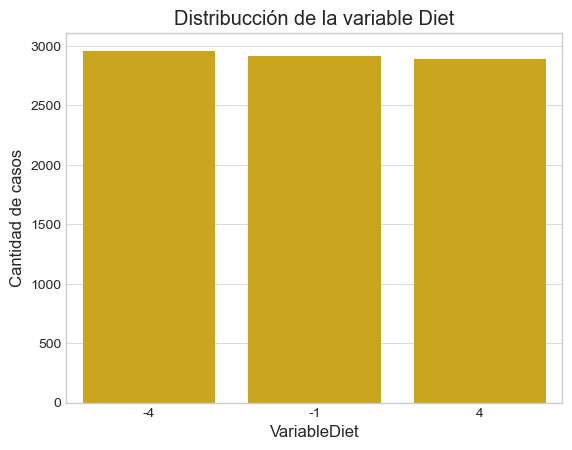

In [97]:
# Cantidad de casos por categoría 
plt.figure()
sns.countplot(data = df,
              x = 'VariableDiet',
             color = '#E7B602')
plt.title('Distribucción de la variable Diet')
plt.ylabel('Cantidad de casos')

In [98]:
conteo = df['VariableDiet'].value_counts() 
conteo_maspresentes = conteo[[-4,-1,4]]
print('Porcentaje con Diet entre -4 y -4:')
print('Porcentaje con Diet entre -1 y -1:')
print('Porcentaje con Diet entre 4 y 4:')
print(str(round(conteo_maspresentes.sum()/conteo.sum(),4)*100) + '%')

Porcentaje con Diet entre -4 y -4:
Porcentaje con Diet entre -1 y -1:
Porcentaje con Diet entre 4 y 4:
100.0%


Análisis Bivariado
Lo próximo que haremos es ver cómo es la relación de esta variable con nuestro target. ¿Se visualiza la alta correlación que calculamos? Veamoslo en un gráfico.

Text(0.5, 1.0, 'Relación entre Logaritmo del Precio de Venta y OverallQual')

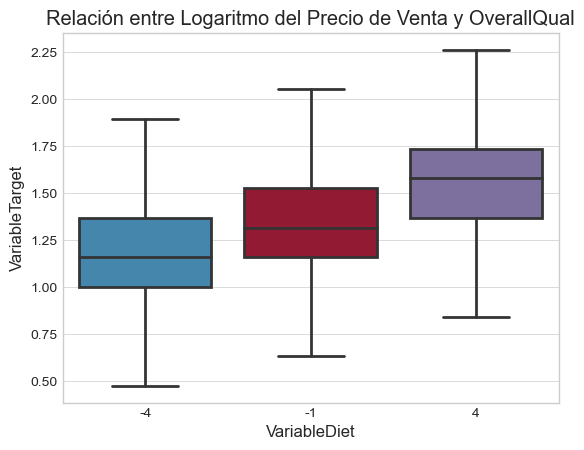

In [99]:
# Boxplot
plt.figure()
sns.boxplot(data = df,
            x = 'VariableDiet',
            y = 'VariableTarget', 
            showfliers = False)
plt.title('Relación entre Logaritmo del Precio de Venta y OverallQual')

Conclusión:
Se puede apreciar que a medida que aumenta el puntaje asignado a en mi variabletarget, aumenta la cantidad de casos en mi variableDiet.

Esto significa que la variable podría funcionar como una buena predictora del precio de aumento de casos. En una siguiente etapa habrá que estudiar cuál es la mejor manera de incluirla en un algoritmo. Pero la relación es evidente y coherente.

nuestra proxima variable que vamos a analizar es nuestra variable Colesterol.

In [100]:
df["VariableCholesterol"].describe().round(2)

count   8763.00
mean       2.63
std        1.23
min        1.00
25%        1.00
50%        3.00
75%        4.00
max        4.00
Name: VariableCholesterol, dtype: float64

Text(0.5, 1.0, 'Distribución de VariableCholesterol')

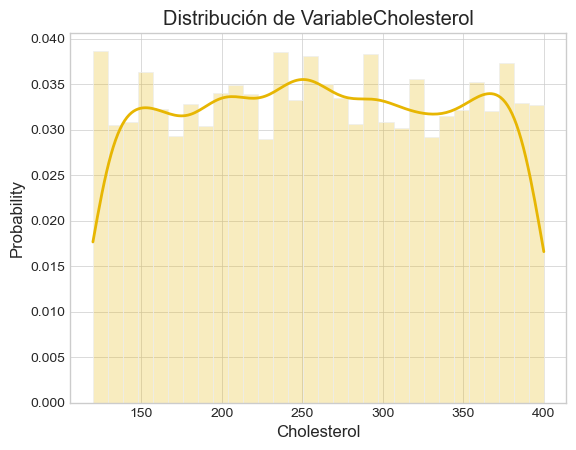

In [101]:
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'Cholesterol',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#E7B602')
plt.title('Distribución de VariableCholesterol')

Text(0.5, 1.0, 'Distribución de GrLivArea transformada en logaritmo')

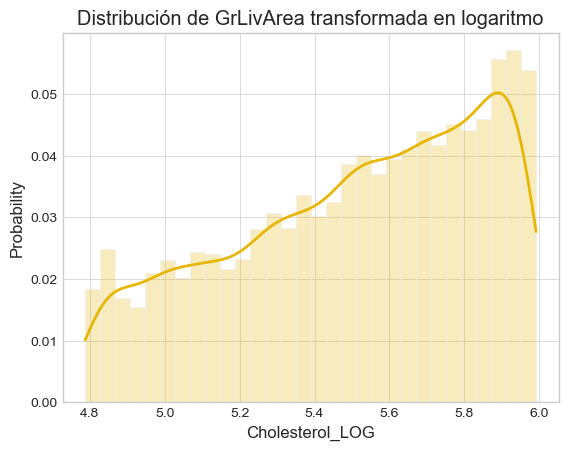

In [102]:
df['Cholesterol_LOG'] = np.log(df['Cholesterol'])
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'Cholesterol_LOG',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#E7B602')
plt.title('Distribución de GrLivArea transformada en logaritmo')

Text(0.5, 1.0, 'Relación entre Precio de Venta y Área Habitable (en logaritmo las dos)')

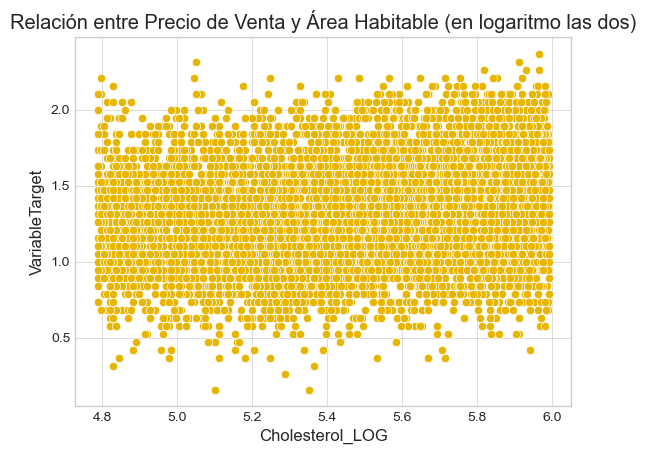

In [103]:
# Gráfico de puntos para evaluar relación
sns.scatterplot(data = df,
                x = 'Cholesterol_LOG',
                y = 'VariableTarget',
                color = '#E7B602')
plt.title('Relación entre Precio de Venta y Área Habitable (en logaritmo las dos)')

Efectivamente la relación se muestra no es  fuerte. Es una variable que analizada de esta forma no revela importancia en su relacion.

# Quinta entrega  --------Práctica integradora-------

# Information Value... mi df.. no tiene campo de fechas..

# Sexta Entrega  --------------- Evaluando modelos ML-------------- 
 # y Septima entrega-------- Primera entrega de tu Proyecto final--------

Vamos a realizar una evaluacion de nuestras variables mas importantes y que mejor se relacionan.

In [104]:
# Calculo matriz de correlación 
matriz_correlacion = df.corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['VariableTarget']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['VariableTarget',"VariableTarget_Log"]
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

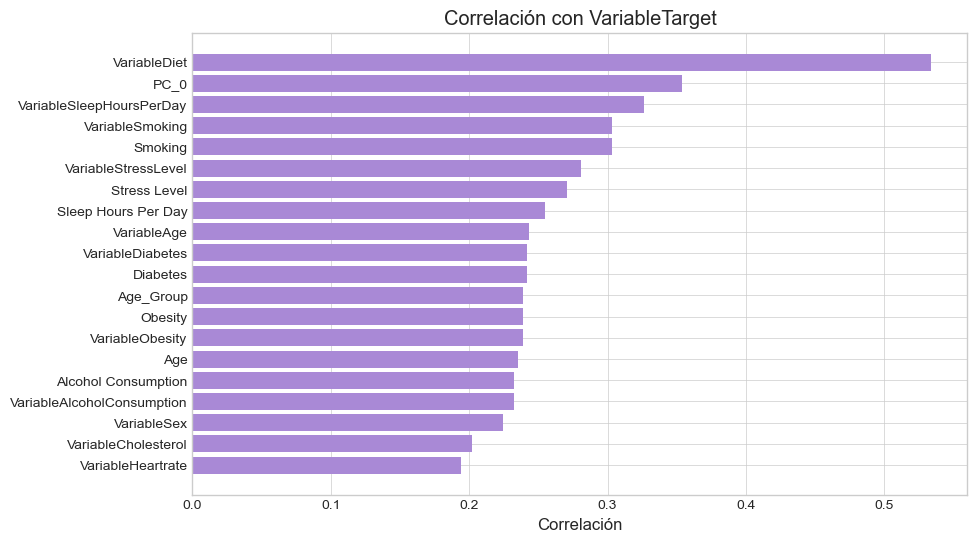

In [105]:
# Grafico el top 20 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con VariableTarget')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

In [106]:
valores_nulos  = df.isnull().sum()
columnas_con_nulos = valores_nulos[valores_nulos == 0]
columnas_con_nulos

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Presion Sistolica                  0
Presion Diastolica                 0
A

In [107]:
# Defino función para hacer la selección de varaibles
def forward_selection(data, VariableTarget, significance_level):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(dtype = 'float64',
                             index = remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(VariableTarget, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [108]:
# Matriz de Features
X = df[["VariableAge","VariableSex", "VariableCholesterol","VariablePresionSistolica", "VariablePresionDiastolica","VariableHeartrate","VariableDiabetes",
        "VariableFamilyHistory","VariableSmoking", "VariableObesity","VariableAlcoholConsumption","VariableExerciseHoursPerWeek","VariableDiet","VariablePreviousHeartProblem","VariableStressLevel",
"VariableBMI","VariableTriglycerides","VariableSleepHoursPerDay","VariableHeartAttackRisk"]]    

# Target
Y = df['VariableTarget']

In [109]:
print(X)

            VariableAge  VariableSex  VariableCholesterol  \
Patient ID                                                  
0                     3            3                    2   
1                     1            3                    4   
2                     1            1                    4   
3                     4            3                    4   
4                     3            3                    4   
...                 ...          ...                  ...   
8758                  3            3                    1   
8759                  1            1                    1   
8760                  2            3                    3   
8761                  1            3                    1   
8762                  1            1                    4   

            VariablePresionSistolica  VariablePresionDiastolica  \
Patient ID                                                        
0                                  3                          0   
1    

In [110]:
print(Y)

Patient ID
0      1.11
1      1.53
2      1.05
3      1.79
4      1.68
       ... 
8758   1.16
8759   0.74
8760   1.84
8761   1.16
8762   1.16
Name: VariableTarget, Length: 8763, dtype: float64


In [111]:
initial_features = X.columns.tolist()
best_features = []

In [112]:
initial_features

['VariableAge',
 'VariableSex',
 'VariableCholesterol',
 'VariablePresionSistolica',
 'VariablePresionDiastolica',
 'VariableHeartrate',
 'VariableDiabetes',
 'VariableFamilyHistory',
 'VariableSmoking',
 'VariableObesity',
 'VariableAlcoholConsumption',
 'VariableExerciseHoursPerWeek',
 'VariableDiet',
 'VariablePreviousHeartProblem',
 'VariableStressLevel',
 'VariableBMI',
 'VariableTriglycerides',
 'VariableSleepHoursPerDay',
 'VariableHeartAttackRisk']

In [113]:
best_features

[]

In [114]:
len(initial_features)

19

In [115]:
remaining_features = list(set(initial_features)-set(best_features))
remaining_features

['VariableDiabetes',
 'VariableBMI',
 'VariableDiet',
 'VariablePresionSistolica',
 'VariableObesity',
 'VariableAlcoholConsumption',
 'VariableHeartrate',
 'VariableHeartAttackRisk',
 'VariablePresionDiastolica',
 'VariableStressLevel',
 'VariableExerciseHoursPerWeek',
 'VariableCholesterol',
 'VariableTriglycerides',
 'VariableSleepHoursPerDay',
 'VariablePreviousHeartProblem',
 'VariableSex',
 'VariableAge',
 'VariableSmoking',
 'VariableFamilyHistory']

In [116]:
new_pval = pd.Series(dtype='float64',
                     index = remaining_features)
new_pval

VariableDiabetes               NaN
VariableBMI                    NaN
VariableDiet                   NaN
VariablePresionSistolica       NaN
VariableObesity                NaN
VariableAlcoholConsumption     NaN
VariableHeartrate              NaN
VariableHeartAttackRisk        NaN
VariablePresionDiastolica      NaN
VariableStressLevel            NaN
VariableExerciseHoursPerWeek   NaN
VariableCholesterol            NaN
VariableTriglycerides          NaN
VariableSleepHoursPerDay       NaN
VariablePreviousHeartProblem   NaN
VariableSex                    NaN
VariableAge                    NaN
VariableSmoking                NaN
VariableFamilyHistory          NaN
dtype: float64

In [117]:
sfs = SFS(LinearRegression(),
          k_features = 9,
          forward = True,
          floating = False,
          scoring = 'r2',
          cv = 0)

In [118]:
sfs.fit(X, Y)
sfs.k_feature_names_

('VariableCholesterol',
 'VariableHeartrate',
 'VariableDiabetes',
 'VariableSmoking',
 'VariableObesity',
 'VariableAlcoholConsumption',
 'VariableDiet',
 'VariableStressLevel',
 'VariableSleepHoursPerDay')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

# Entrega 14

##  Vamos a crear nuevas variables adicionales que permitan mejorar el desempeño de mis modelos anteriores. 

In [120]:
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,VariableBMI,VariableTriglycerides,VariableSleepHoursPerDay,VariableHeartAttackRisk,VariableTarget,Otlier_IQR,PC_0,PC_1,VariableTarget_Log,Cholesterol_LOG
Patient ID,,,,,,,,,,,,,,,,,,,,,
0,67,Male,208,158/88,72,0,0,1,0,0,...,2,1,4,0,1.11,0,-1.03,0.18,0.10,5.34
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,1,0,0,1.53,0,-0.03,-1.70,0.42,5.96
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,3,4,0,1.05,0,3.43,0.68,0.05,5.78
3,84,Male,383,163/100,73,1,1,1,0,1,...,2,1,4,0,1.79,0,-1.41,0.05,0.58,5.95
4,66,Male,318,91/88,93,1,1,1,1,0,...,0,1,4,0,1.68,0,-0.96,0.31,0.52,5.76


# Separamos en Train y en Test.

In [121]:
# Separamos en train y test
from sklearn.model_selection import train_test_split

# Variables a procesar
features = ['VariableCholesterol','VariableDiabetes','VariableSmoking','VariableBMI','Heart Attack Risk']
df_limpia = df.dropna(subset= features)
df_train,df_test = train_test_split(df_limpia,
                                    test_size = 0.2, #Porcentaje de muestra test 
                                    random_state = 43) #Semilla
df_train = df_train.reset_index()
df_test = df_test.reset_index()

# Normalizamos los datos

In [122]:
# Normalizamos los datos
from sklearn.preprocessing import StandardScaler

X_train = df_train[features].values
X_test = df_test[features].values

# Defino escalador
sc = StandardScaler()
# Genero parámetros con train
X_train = sc.fit_transform(X_train)
# Le aplico el escalador a test
X_test = sc.transform(X_test)

# Genero df
df_train_scaled = pd.DataFrame(data = X_train)
prefijo = "Scaled_"
df_train_scaled.columns = features
df_train_scaled.add_prefix(prefijo)
df_train_scaled = df_train_scaled.add_prefix(prefijo)
df_test_scaled = pd.DataFrame(data = X_test)
prefijo = "Scaled_"
df_test_scaled.columns = features
df_test_scaled = df_test_scaled.add_prefix(prefijo)

df_train_scaled.head()

,Scaled_VariableCholesterol,Scaled_VariableDiabetes,Scaled_VariableSmoking,Scaled_VariableBMI,Scaled_Heart Attack Risk
0,0.31,-1.37,0.34,0.99,-0.75
1,1.12,0.73,0.34,0.99,1.34
2,1.12,-1.37,0.34,-2.30,-0.75
3,1.12,-1.37,0.34,-0.11,-0.75
4,-1.31,0.73,0.34,-1.21,-0.75


# Identificación de Outliers
Para identificarlos vamos a utilizar el algoritmo IsolationForest

In [123]:
df_train_scaled_SinNa = df_train_scaled.dropna()
df_test_scaled_SinNa = df_test_scaled.dropna()


# Genero las matrices sin NAs para correr el algoritmo
X_train = df_train_scaled_SinNa.values
X_test = df_test_scaled_SinNa.values

# Identificar outliers en el dataset de train
iso = IsolationForest(contamination = 0.01) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(X_train)

# Marco Outlier en train
df_train_scaled_SinNa['EsOutlier'] = yhat == (-1)

# En test: 
yhat_test = iso.predict(X_test)
df_test_scaled_SinNa['EsOutlier'] = yhat_test == (-1)

df_train_scaled_SinNa.head()

,Scaled_VariableCholesterol,Scaled_VariableDiabetes,Scaled_VariableSmoking,Scaled_VariableBMI,Scaled_Heart Attack Risk,EsOutlier
0,0.31,-1.37,0.34,0.99,-0.75,False
1,1.12,0.73,0.34,0.99,1.34,False
2,1.12,-1.37,0.34,-2.30,-0.75,False
3,1.12,-1.37,0.34,-0.11,-0.75,False
4,-1.31,0.73,0.34,-1.21,-0.75,False


In [124]:
# Cuántos outliers marcó? 
df_train_scaled_SinNa['EsOutlier'].value_counts()

False    6939
True       71
Name: EsOutlier, dtype: int64

In [125]:
# Identifiquemoslos visualmente con PCA

# Genero PCA sin target
X_train = df_train_scaled_SinNa.drop(['Scaled_Heart Attack Risk','EsOutlier'], axis=1).values
X_test = df_test_scaled_SinNa.drop(['Scaled_Heart Attack Risk','EsOutlier'], axis=1).values

# Inicio el objeto PCA
pca = PCA()
# Genero componentes con TRAIN
PCA_train = pca.fit_transform(X_train)
# Aplico a test
PCA_test = pca.transform(X_test)

# Almaceno en dataframe y presento
# Train
PCA_train = pd.DataFrame(data = PCA_train)
prefijo = "PC_"
PCA_train = PCA_train.add_prefix(prefijo)
# Test
PCA_test = pd.DataFrame(data = PCA_test)
prefijo = "PC_"
PCA_test = PCA_test.add_prefix(prefijo)

# Me llevo los primeros dos componentes a los dataframes escalados
df_train_scaled_SinNa['PC_0'] = PCA_train['PC_0']
df_test_scaled_SinNa['PC_0'] = PCA_test['PC_0']

df_train_scaled_SinNa.head()

,Scaled_VariableCholesterol,Scaled_VariableDiabetes,Scaled_VariableSmoking,Scaled_VariableBMI,Scaled_Heart Attack Risk,EsOutlier,PC_0
0,0.31,-1.37,0.34,0.99,-0.75,False,-0.99
1,1.12,0.73,0.34,0.99,1.34,False,-1.23
2,1.12,-1.37,0.34,-2.30,-0.75,False,-0.34
3,1.12,-1.37,0.34,-0.11,-0.75,False,-1.15
4,-1.31,0.73,0.34,-1.21,-0.75,False,1.27


Text(0.5, 1.0, 'Identificación Outliers')

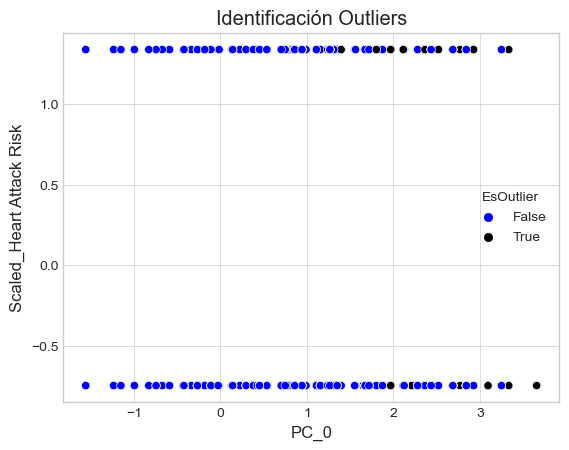

In [126]:
# Visualizo
plt.figure()
sns.scatterplot(data = df_train_scaled_SinNa,
                x = 'PC_0',
                y = 'Scaled_Heart Attack Risk',
                hue = 'EsOutlier',               
                palette={0: 'blue', 1: 'black'})
plt.title('Identificación Outliers')

Text(0.5, 0.98, 'Relación entre SalePrice y resto de las variables')

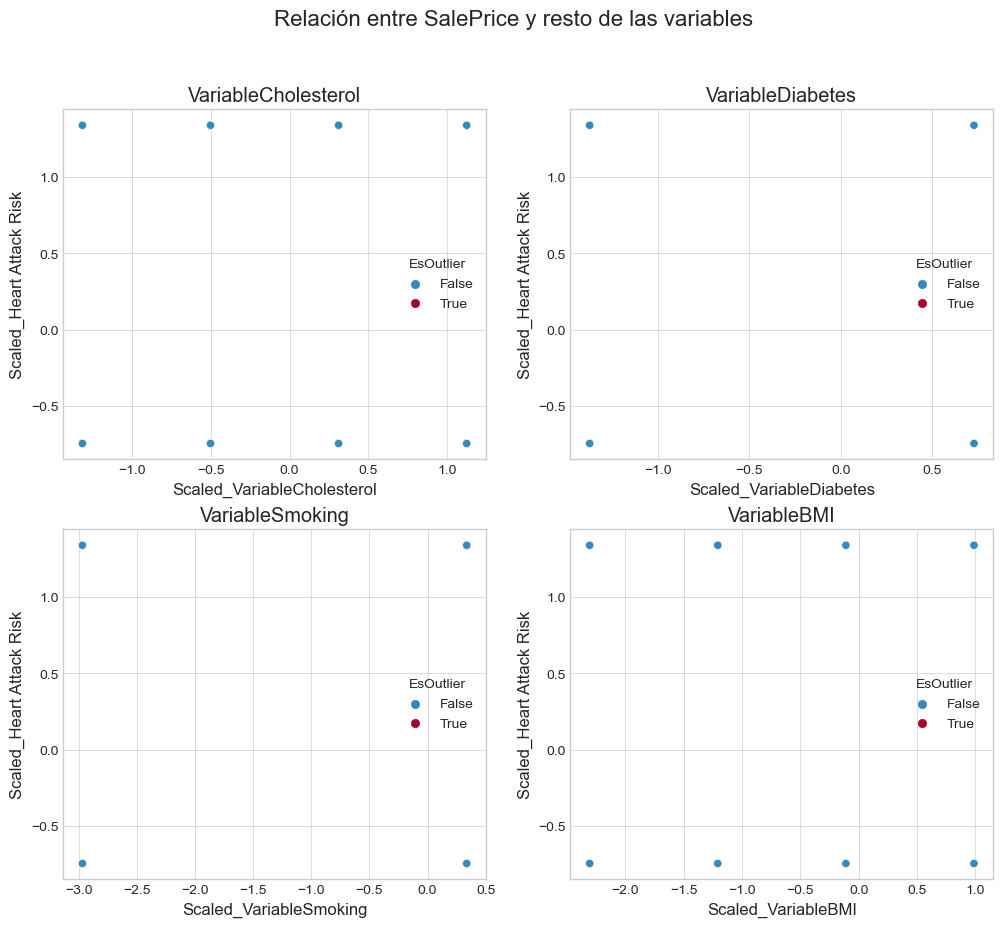

In [127]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data = df_train_scaled_SinNa,
                x = 'Scaled_VariableCholesterol',
                y = 'Scaled_Heart Attack Risk',
                hue = 'EsOutlier',
                ax = axs[0, 0])
axs[0, 0].set_title('VariableCholesterol')

sns.scatterplot(data = df_train_scaled_SinNa,
                x = 'Scaled_VariableDiabetes',
                y = 'Scaled_Heart Attack Risk',
                hue = 'EsOutlier',
                ax = axs[0, 1])
axs[0, 1].set_title('VariableDiabetes')

sns.scatterplot(data = df_train_scaled_SinNa,
                x = 'Scaled_VariableSmoking',
                y = 'Scaled_Heart Attack Risk',
                hue = 'EsOutlier',
                ax = axs[1, 0])
axs[1, 0].set_title('VariableSmoking')

sns.scatterplot(data = df_train_scaled_SinNa,
                x = 'Scaled_VariableBMI',
                y = 'Scaled_Heart Attack Risk',
                hue = 'EsOutlier',
                ax = axs[1, 1])
axs[1, 1].set_title('VariableBMI')


plt.suptitle('Relación entre SalePrice y resto de las variables', fontsize=16)

# ¿Cómo sigo? 
Vamos a reemplazar por nulos los valores de una de las variables, y vamos a utilizar un algoritmo de  reemplazo de nulos para rellenar esos outliers

### VariableCholesterol

In [128]:
# Preprocesamiento 
df_train_scaled_SinNa['Scaled_VariableCholesterol_NA'] = df_train_scaled_SinNa['Scaled_VariableCholesterol'] 
df_test_scaled_SinNa['Scaled_VariableCholesterol_NA'] = df_test_scaled_SinNa['Scaled_VariableCholesterol'] 
df_train_scaled_SinNa.loc[df_train_scaled_SinNa['EsOutlier'] == True, 'Scaled_VariableCholesterol_NA'] = None 
df_test_scaled_SinNa.loc[df_test_scaled_SinNa['EsOutlier'] == True, 'Scaled_VariableCholesterol_NA'] = None 

In [133]:
# Abro librería
from fancyimpute import IterativeImputer

# Genero el imputador
imputador = IterativeImputer(max_iter = 20,
                             random_state = 123)

features_imput_outliers = ['Scaled_VariableDiabetes','Scaled_VariableSmoking','Scaled_VariableBMI','Scaled_VariableCholesterol_NA']

# Lo entreno
imputador.fit(df_train_scaled_SinNa[features_imput_outliers])

# Lo aplico
df_train_imputada = pd.DataFrame(imputador.transform(df_train_scaled_SinNa[features_imput_outliers]))
df_test_imputada = pd.DataFrame(imputador.transform(df_test_scaled_SinNa[features_imput_outliers]))
df_train_imputada.columns = features_imput_outliers
df_test_imputada.columns = features_imput_outliers

# Asigno nombres de columnas
df_train_scaled_SinNa['Scaled_VariableCholesterol_Inputada'] = df_train_imputada['Scaled_VariableCholesterol_NA']
df_test_scaled_SinNa['Scaled_VariableCholesterol_Inputada'] = df_test_imputada['Scaled_VariableCholesterol_NA']

df_train_scaled_SinNa.head()

,Scaled_VariableCholesterol,Scaled_VariableDiabetes,Scaled_VariableSmoking,Scaled_VariableBMI,Scaled_Heart Attack Risk,EsOutlier,PC_0,Scaled_VariableCholesterol_NA,Scaled_VariableCholesterol_Inputada
0,0.31,-1.37,0.34,0.99,-0.75,False,-0.99,0.31,0.31
1,1.12,0.73,0.34,0.99,1.34,False,-1.23,1.12,1.12
2,1.12,-1.37,0.34,-2.30,-0.75,False,-0.34,1.12,1.12
3,1.12,-1.37,0.34,-0.11,-0.75,False,-1.15,1.12,1.12
4,-1.31,0.73,0.34,-1.21,-0.75,False,1.27,-1.31,-1.31


Text(0.5, 1.0, 'Imputando')

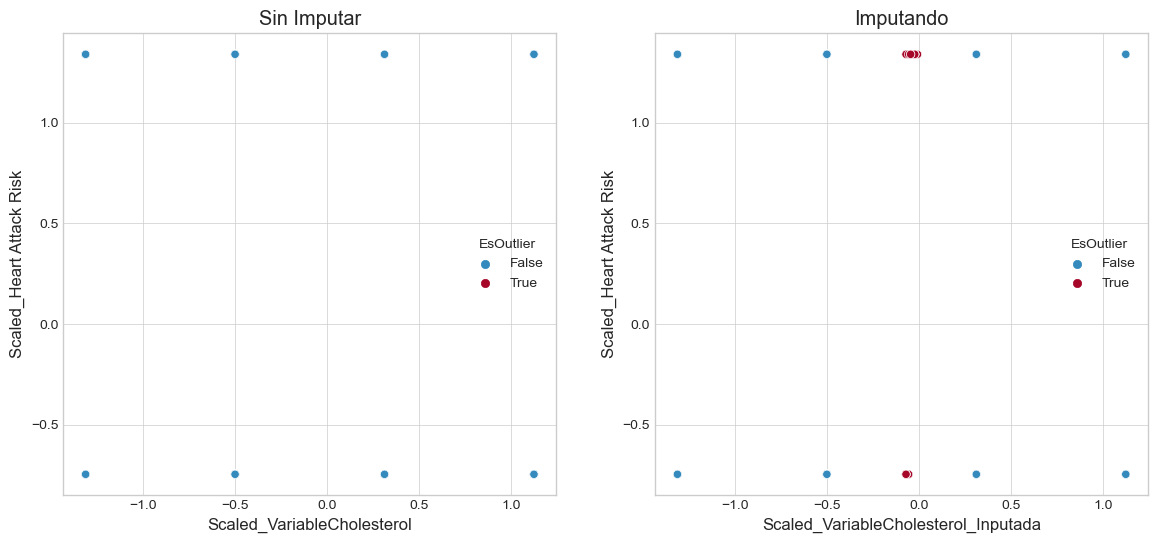

In [135]:
# Y cómo quedó?
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data = df_train_scaled_SinNa,
                x = 'Scaled_VariableCholesterol',
                y = 'Scaled_Heart Attack Risk',
                hue = 'EsOutlier',
                ax = axs[0])

axs[0].set_title('Sin Imputar')

sns.scatterplot(data = df_train_scaled_SinNa,
                x = 'Scaled_VariableCholesterol_Inputada',
                y = 'Scaled_Heart Attack Risk',
                hue = 'EsOutlier',
                ax = axs[1])

axs[1].set_title('Imputando')

### VariableDiabetes

In [136]:
# Preprocesamiento 
df_train_scaled_SinNa['Scaled_VariableDiabetes_NA'] = df_train_scaled_SinNa['Scaled_VariableDiabetes'] 
df_test_scaled_SinNa['Scaled_VariableDiabetes_NA'] = df_test_scaled_SinNa['Scaled_VariableDiabetes'] 
df_train_scaled_SinNa.loc[df_train_scaled_SinNa['EsOutlier'] == True, 'Scaled_VariableDiabetes_NA'] = None 
df_test_scaled_SinNa.loc[df_test_scaled_SinNa['EsOutlier'] == True, 'Scaled_VariableDiabetes_NA'] = None 

In [137]:

# Genero el imputador
imputador = IterativeImputer(max_iter = 20,
                             random_state = 123)

features_imput_outliers = ['Scaled_VariableCholesterol','Scaled_VariableSmoking','Scaled_VariableBMI','Scaled_VariableDiabetes_NA']

# Lo entreno
imputador.fit(df_train_scaled_SinNa[features_imput_outliers])

# Lo aplico
df_train_imputada = pd.DataFrame(imputador.transform(df_train_scaled_SinNa[features_imput_outliers]))
df_test_imputada = pd.DataFrame(imputador.transform(df_test_scaled_SinNa[features_imput_outliers]))
df_train_imputada.columns = features_imput_outliers
df_test_imputada.columns = features_imput_outliers

# Asigno nombres de columnas
df_train_scaled_SinNa['Scaled_VariableDiabetes_Inputada'] = df_train_imputada['Scaled_VariableDiabetes_NA']
df_test_scaled_SinNa['Scaled_VariableDiabetes_Inputada'] = df_test_imputada['Scaled_VariableDiabetes_NA']

df_train_scaled_SinNa.head()

,Scaled_VariableCholesterol,Scaled_VariableDiabetes,Scaled_VariableSmoking,Scaled_VariableBMI,Scaled_Heart Attack Risk,EsOutlier,PC_0,Scaled_VariableCholesterol_NA,Scaled_VariableCholesterol_Inputada,Scaled_VariableDiabetes_NA,Scaled_VariableDiabetes_Inputada
0,0.31,-1.37,0.34,0.99,-0.75,False,-0.99,0.31,0.31,-1.37,-1.37
1,1.12,0.73,0.34,0.99,1.34,False,-1.23,1.12,1.12,0.73,0.73
2,1.12,-1.37,0.34,-2.30,-0.75,False,-0.34,1.12,1.12,-1.37,-1.37
3,1.12,-1.37,0.34,-0.11,-0.75,False,-1.15,1.12,1.12,-1.37,-1.37
4,-1.31,0.73,0.34,-1.21,-0.75,False,1.27,-1.31,-1.31,0.73,0.73


Text(0.5, 1.0, 'Imputando')

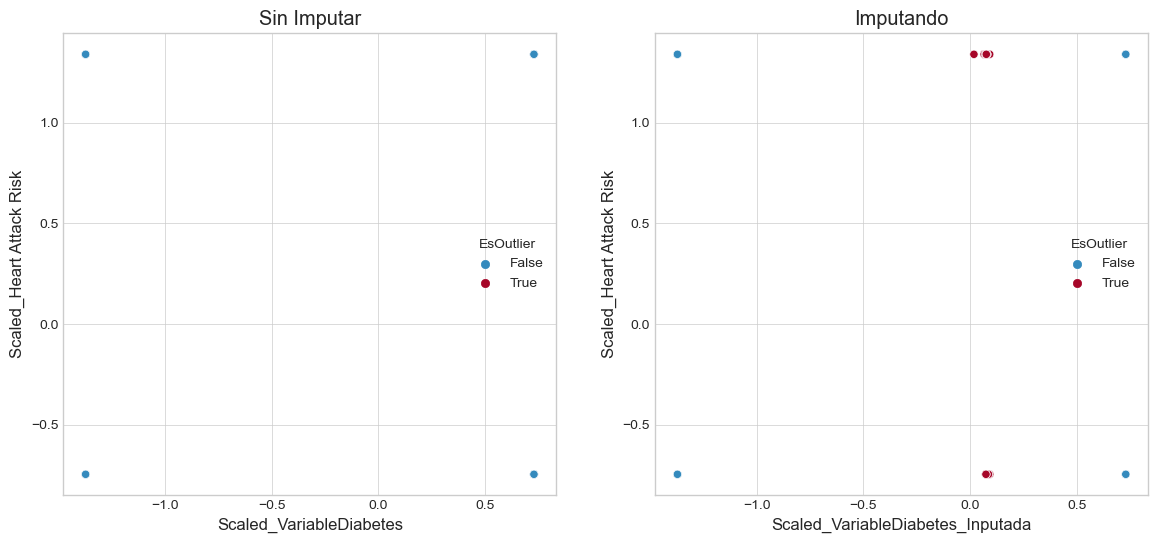

In [138]:
# Y cómo quedó?
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data = df_train_scaled_SinNa,
                x = 'Scaled_VariableDiabetes',
                y = 'Scaled_Heart Attack Risk',
                hue = 'EsOutlier',
                ax = axs[0])

axs[0].set_title('Sin Imputar')

sns.scatterplot(data = df_train_scaled_SinNa,
                x = 'Scaled_VariableDiabetes_Inputada',
                y = 'Scaled_Heart Attack Risk',
                hue = 'EsOutlier',
                ax = axs[1])

axs[1].set_title('Imputando')

In [139]:
# Preprocesamiento 
df_train_scaled_SinNa['Scaled_VariableSmoking_NA'] = df_train_scaled_SinNa['Scaled_VariableSmoking'] 
df_test_scaled_SinNa['Scaled_VariableSmoking_NA'] = df_test_scaled_SinNa['Scaled_VariableSmoking'] 
df_train_scaled_SinNa.loc[df_train_scaled_SinNa['EsOutlier'] == True, 'Scaled_VariableSmoking_NA'] = None 
df_test_scaled_SinNa.loc[df_test_scaled_SinNa['EsOutlier'] == True, 'Scaled_VariableSmoking_NA'] = None 

In [151]:

# Genero el imputador
imputador = IterativeImputer(max_iter = 20,
                             random_state = 123)

features_imput_outliers = ['Scaled_VariableDiabetes','Scaled_VariableCholesterol','Scaled_VariableBMI','Scaled_VariableSmoking_NA']

# Lo entreno
imputador.fit(df_train_scaled_SinNa[features_imput_outliers])

# Lo aplico
df_train_imputada = pd.DataFrame(imputador.transform(df_train_scaled_SinNa[features_imput_outliers]))
df_test_imputada = pd.DataFrame(imputador.transform(df_test_scaled_SinNa[features_imput_outliers]))
df_train_imputada.columns = features_imput_outliers
df_test_imputada.columns = features_imput_outliers

# Asigno nombres de columnas
df_train_scaled_SinNa['Scaled_VariableSmoking_Inputada'] = df_train_imputada['Scaled_VariableSmoking_NA']
df_test_scaled_SinNa['Scaled_VariableSmoking_Inputada'] = df_test_imputada['Scaled_VariableSmoking_NA']

df_train_scaled_SinNa.head()

,Scaled_VariableCholesterol,Scaled_VariableDiabetes,Scaled_VariableSmoking,Scaled_VariableBMI,Scaled_Heart Attack Risk,EsOutlier,PC_0,Scaled_VariableCholesterol_NA,Scaled_VariableCholesterol_Inputada,Scaled_VariableDiabetes_NA,Scaled_VariableDiabetes_Inputada,Scaled_VariableSmoking_NA,Scaled_VariableSmoking_Inputada,Scaled_VariableBMI_NA,Scaled_VariableBMI_Inputada,Riesgo Cardiaco Alto
0,0.31,-1.37,0.34,0.99,-0.75,False,-0.99,0.31,0.31,-1.37,-1.37,0.34,0.34,0.99,0.99,0
1,1.12,0.73,0.34,0.99,1.34,False,-1.23,1.12,1.12,0.73,0.73,0.34,0.34,0.99,0.99,1
2,1.12,-1.37,0.34,-2.30,-0.75,False,-0.34,1.12,1.12,-1.37,-1.37,0.34,0.34,-2.30,-2.30,0
3,1.12,-1.37,0.34,-0.11,-0.75,False,-1.15,1.12,1.12,-1.37,-1.37,0.34,0.34,-0.11,-0.11,0
4,-1.31,0.73,0.34,-1.21,-0.75,False,1.27,-1.31,-1.31,0.73,0.73,0.34,0.34,-1.21,-1.21,0


Text(0.5, 1.0, 'Imputando')

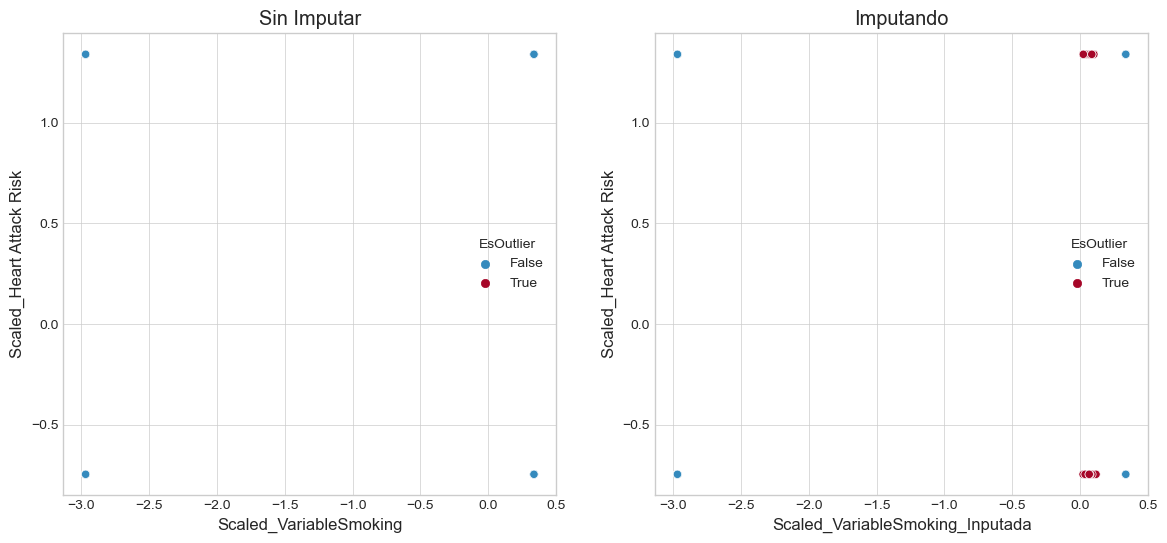

In [152]:
# Y cómo quedó?
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data = df_train_scaled_SinNa,
                x = 'Scaled_VariableSmoking',
                y = 'Scaled_Heart Attack Risk',
                hue = 'EsOutlier',
                ax = axs[0])

axs[0].set_title('Sin Imputar')

sns.scatterplot(data = df_train_scaled_SinNa,
                x = 'Scaled_VariableSmoking_Inputada',
                y = 'Scaled_Heart Attack Risk',
                hue = 'EsOutlier',
                ax = axs[1])

axs[1].set_title('Imputando')

In [145]:
# Preprocesamiento 
df_train_scaled_SinNa['Scaled_VariableBMI_NA'] = df_train_scaled_SinNa['Scaled_VariableBMI'] 
df_test_scaled_SinNa['Scaled_VariableBMI_NA'] = df_test_scaled_SinNa['Scaled_VariableBMI'] 
df_train_scaled_SinNa.loc[df_train_scaled_SinNa['EsOutlier'] == True, 'Scaled_VariableBMI_NA'] = None 
df_test_scaled_SinNa.loc[df_test_scaled_SinNa['EsOutlier'] == True, 'Scaled_VariableBMI_NA'] = None 

In [146]:

# Genero el imputador
imputador = IterativeImputer(max_iter = 20,
                             random_state = 123)

features_imput_outliers = ['Scaled_VariableDiabetes','Scaled_VariableCholesterol','Scaled_VariableBMI','Scaled_VariableBMI_NA']

# Lo entreno
imputador.fit(df_train_scaled_SinNa[features_imput_outliers])

# Lo aplico
df_train_imputada = pd.DataFrame(imputador.transform(df_train_scaled_SinNa[features_imput_outliers]))
df_test_imputada = pd.DataFrame(imputador.transform(df_test_scaled_SinNa[features_imput_outliers]))
df_train_imputada.columns = features_imput_outliers
df_test_imputada.columns = features_imput_outliers

# Asigno nombres de columnas
df_train_scaled_SinNa['Scaled_VariableBMI_Inputada'] = df_train_imputada['Scaled_VariableBMI_NA']
df_test_scaled_SinNa['Scaled_VariableBMI_Inputada'] = df_test_imputada['Scaled_VariableBMI_NA']

df_train_scaled_SinNa.head()

,Scaled_VariableCholesterol,Scaled_VariableDiabetes,Scaled_VariableSmoking,Scaled_VariableBMI,Scaled_Heart Attack Risk,EsOutlier,PC_0,Scaled_VariableCholesterol_NA,Scaled_VariableCholesterol_Inputada,Scaled_VariableDiabetes_NA,Scaled_VariableDiabetes_Inputada,Scaled_VariableSmoking_NA,Scaled_VariableSmoking_Inputada,Scaled_VariableBMI_NA,Scaled_VariableBMI_Inputada
0,0.31,-1.37,0.34,0.99,-0.75,False,-0.99,0.31,0.31,-1.37,-1.37,0.34,0.34,0.99,0.99
1,1.12,0.73,0.34,0.99,1.34,False,-1.23,1.12,1.12,0.73,0.73,0.34,0.34,0.99,0.99
2,1.12,-1.37,0.34,-2.30,-0.75,False,-0.34,1.12,1.12,-1.37,-1.37,0.34,0.34,-2.30,-2.30
3,1.12,-1.37,0.34,-0.11,-0.75,False,-1.15,1.12,1.12,-1.37,-1.37,0.34,0.34,-0.11,-0.11
4,-1.31,0.73,0.34,-1.21,-0.75,False,1.27,-1.31,-1.31,0.73,0.73,0.34,0.34,-1.21,-1.21


Text(0.5, 1.0, 'Imputando')

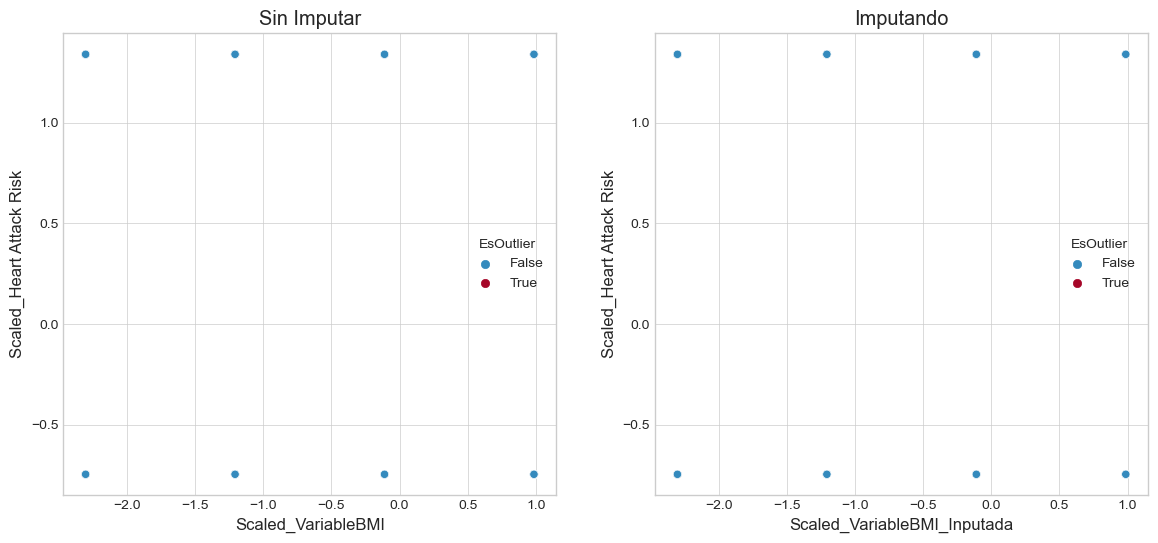

In [147]:
# Y cómo quedó?
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data = df_train_scaled_SinNa,
                x = 'Scaled_VariableBMI',
                y = 'Scaled_Heart Attack Risk',
                hue = 'EsOutlier',
                ax = axs[0])

axs[0].set_title('Sin Imputar')

sns.scatterplot(data = df_train_scaled_SinNa,
                x = 'Scaled_VariableBMI_Inputada',
                y = 'Scaled_Heart Attack Risk',
                hue = 'EsOutlier',
                ax = axs[1])

axs[1].set_title('Imputando')

# Replanteando el problema 
En vez de intentar predecir riesgo cardiaco de nuestros pacientes, vamos a predecir la marca de "RIESGO CARDIACO": 

* Target: Si el valor de riesgo cardiaco  escalado es mayor a 0 entonces suponemos que es de riesgo alto, si no no lo es.

In [149]:
df_train_scaled_SinNa.columns

Index(['Scaled_VariableCholesterol', 'Scaled_VariableDiabetes',
       'Scaled_VariableSmoking', 'Scaled_VariableBMI',
       'Scaled_Heart Attack Risk', 'EsOutlier', 'PC_0',
       'Scaled_VariableCholesterol_NA', 'Scaled_VariableCholesterol_Inputada',
       'Scaled_VariableDiabetes_NA', 'Scaled_VariableDiabetes_Inputada',
       'Scaled_VariableSmoking_NA', 'Scaled_VariableSmoking_Inputada',
       'Scaled_VariableBMI_NA', 'Scaled_VariableBMI_Inputada'],
      dtype='object')

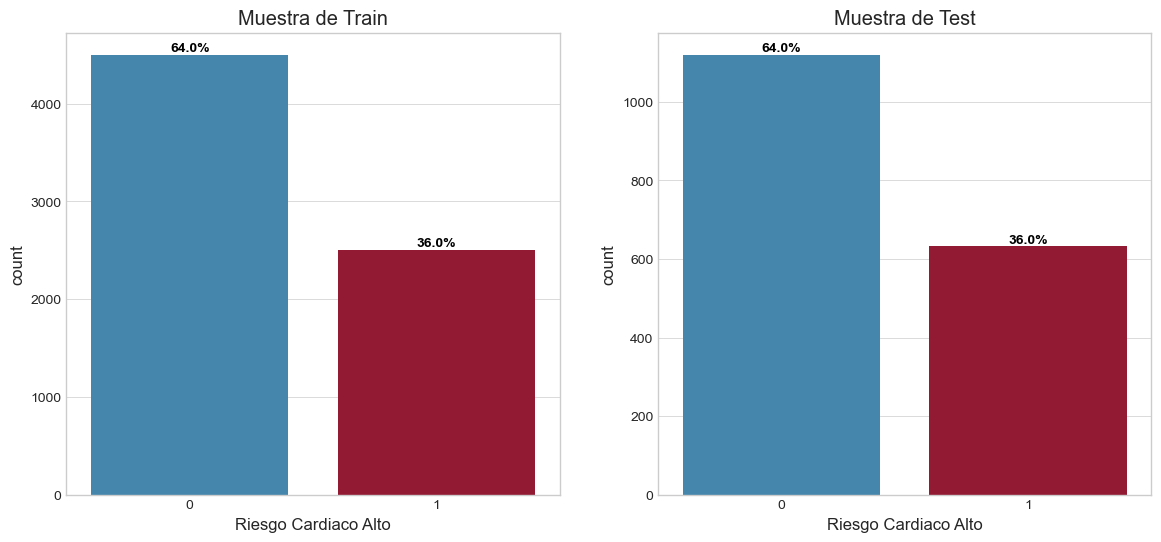

In [150]:
# Construccion del target
df_train_scaled_SinNa['Riesgo Cardiaco Alto'] = np.where(df_train_scaled_SinNa['Scaled_Heart Attack Risk'] > 0,1,0)
df_test_scaled_SinNa['Riesgo Cardiaco Alto'] = np.where(df_test_scaled_SinNa['Scaled_Heart Attack Risk'] > 0,1,0)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Distribucion en Train
cantidad_1 = len(df_train_scaled_SinNa['Riesgo Cardiaco Alto'])
sns.countplot(data = df_train_scaled_SinNa,
              x = "Riesgo Cardiaco Alto",
              ax = axs[0])
axs[0].set_title('Muestra de Train')
#axs[0] = plt.gca()
for p in axs[0].patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    axs[0].text(x_text, y_text, f'{str(round(int(y_text)/cantidad_1,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
    
# Distribucion en Test
cantidad = len(df_test_scaled_SinNa['Riesgo Cardiaco Alto'])
sns.countplot(data = df_test_scaled_SinNa,
              x = "Riesgo Cardiaco Alto",
              ax = axs[1])
axs[1].set_title('Muestra de Test')
#axs[1] = plt.gca()
for p in axs[1].patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    axs[1].text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
    
plt.show()

# Modelos 
Vamos a trabajar con regresión logística. Vamos a generar dos modelos, con y sin tratamiento de outliers, y evaluaremos las diferencias.

## Modelo 2: Con tratamiento de Outliers

In [153]:
# Selecciono features y genero inputs del modelo
features = ["Scaled_VariableDiabetes",'Scaled_VariableCholesterol','Scaled_VariableBMI','Scaled_VariableBMI']
X_train = df_train_scaled_SinNa[features].values
y_train = df_train_scaled_SinNa['Riesgo Cardiaco Alto'].values
X_test = df_test_scaled_SinNa[features].values
y_test = df_test_scaled_SinNa['Riesgo Cardiaco Alto'].values

# Genero y entreno
reg_log_2 = LogisticRegression()
reg_log_2.fit(X_train, y_train)

# Predicciones
y_pred_train = reg_log_2.predict(X_train)
y_pred_test = reg_log_2.predict(X_test)
y_pred_prob_train = reg_log_2.predict_proba(X_train)[:,1]
y_pred_prob_test = reg_log_2.predict_proba(X_test)[:,1]

In [154]:
# Metricas
print('TRAIN')
accuracy_rg2_train = round(accuracy_score(y_train, y_pred_train),5)
conf_matrix_rg2_train = confusion_matrix(y_train, y_pred_train)
recall_rg2_train = round(recall_score(y_train, y_pred_train),5)
f1_rg2_train = round(f1_score(y_train, y_pred_train),5)

print(f'Accuracy: {accuracy_rg2_train}')
print(f'Recall: {recall_rg2_train}')
print(f'F1 Score: {f1_rg2_train}')
print(f'Confusion Matrix:\n{conf_matrix_rg2_train}')
print('-----------------------------------------------')
print('-----------------------------------------------')
print('TEST')
accuracy_rg2_test = round(accuracy_score(y_test, y_pred_test),5)
conf_matrix_rg2_test = confusion_matrix(y_test, y_pred_test)
recall_rg2_test = round(recall_score(y_test, y_pred_test),5)
f1_rg2_test = round(f1_score(y_test, y_pred_test),5)

print(f'Accuracy: {accuracy_rg2_test}')
print(f'Confusion Matrix:\n{conf_matrix_rg2_test}')
print(f'Recall: {recall_rg2_test}')
print(f'F1 Score: {f1_rg2_test}')

TRAIN
Accuracy: 0.64237
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[4503    0]
 [2507    0]]
-----------------------------------------------
-----------------------------------------------
TEST
Accuracy: 0.63948
Confusion Matrix:
[[1121    0]
 [ 632    0]]
Recall: 0.0
F1 Score: 0.0


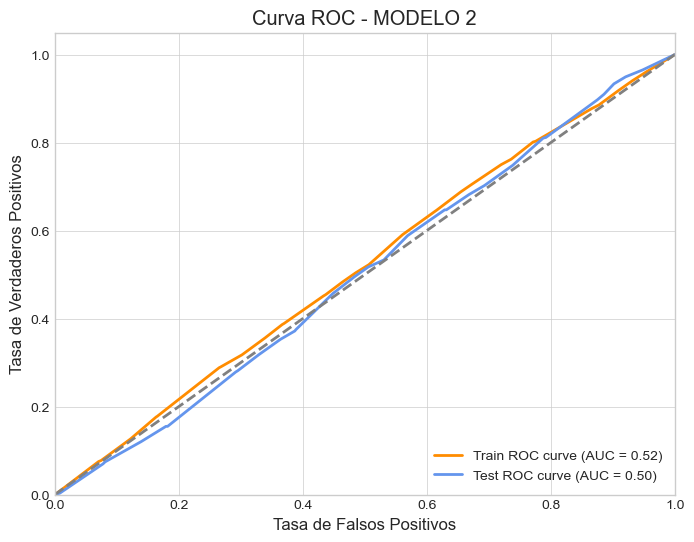

In [155]:
# ROC Y AUC
# Calcula las curvas ROC y el área bajo la curva (AUC) para entrenamiento y prueba
y_train = y_train
y_train_proba = y_pred_prob_train
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = y_test
y_test_proba = y_pred_prob_test
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
roc_2 = plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - MODELO 2')
plt.legend(loc='lower right')
plt.show()